In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import neighbors
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [3]:
df = pd.read_csv('train (1).csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [6]:
df.isnull().sum().max()

1453

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(df_missingData.head(20))
df.isnull().sum().max()

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

1453

In [8]:
df_dropped = df.drop(df_missingData[(df_missingData.Percent > .15)].index, axis=1)

In [9]:
df_dropped.isnull().sum().max()

81

In [10]:
#drop null rows
df_dropped = df_dropped.dropna()
df_dropped.isnull().sum().max()

0

In [11]:
# drop id column
df_dropped = df_dropped.drop('Id',axis=1)

In [12]:
df_dropped.shape

(1338, 74)

In [13]:
# identify columns in numeric and text columns
cols = df_dropped.columns
numCols = df_dropped._get_numeric_data().columns
catTxtCols = list(set(cols) - set(numCols))

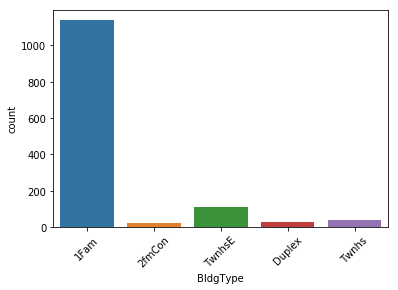

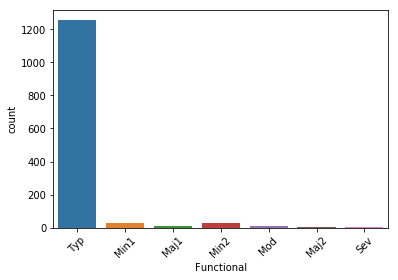

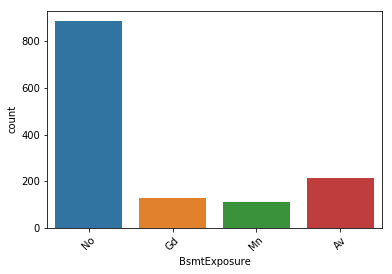

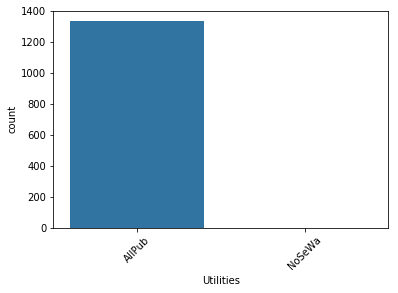

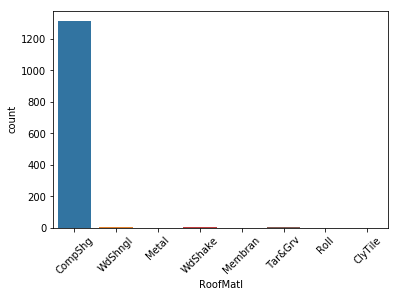

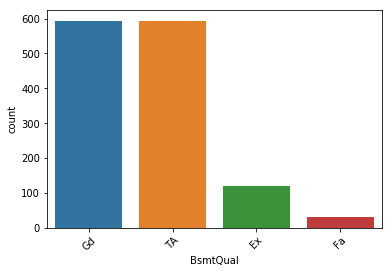

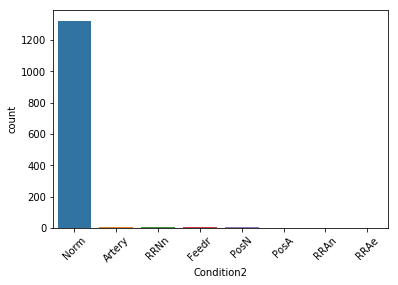

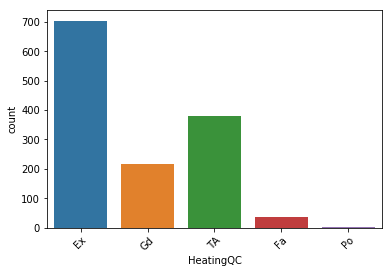

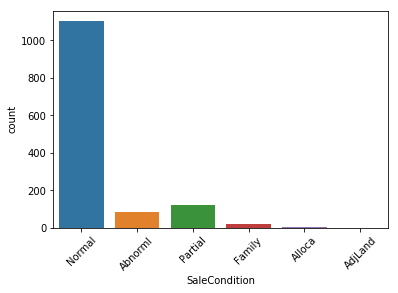

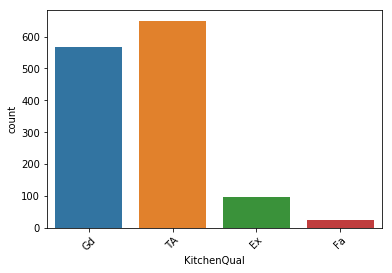

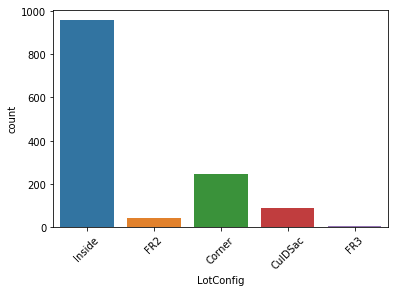

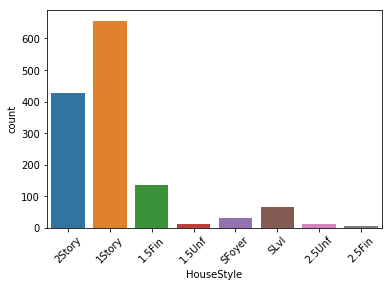

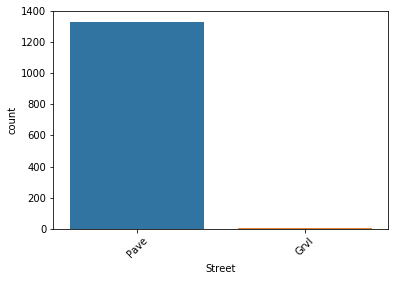

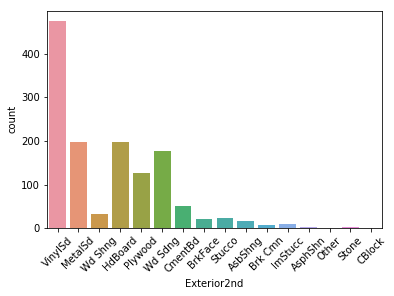

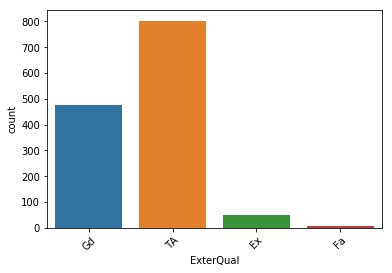

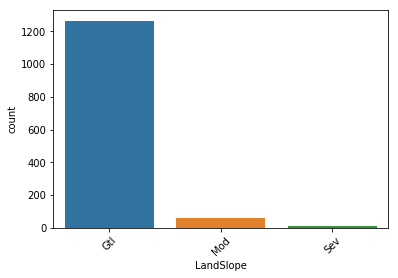

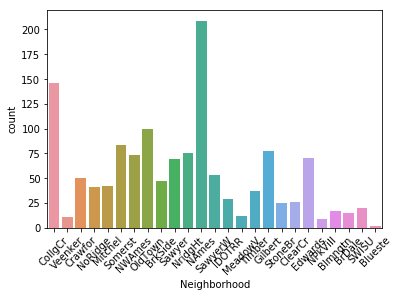

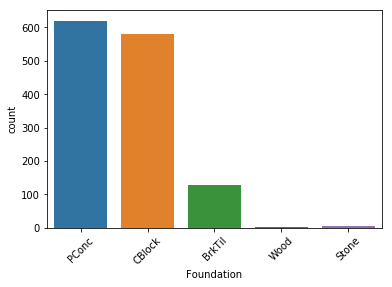

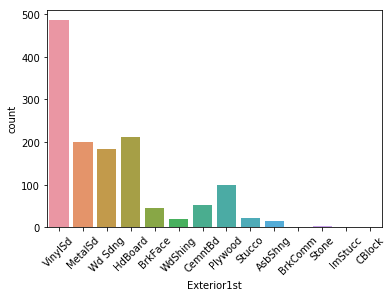

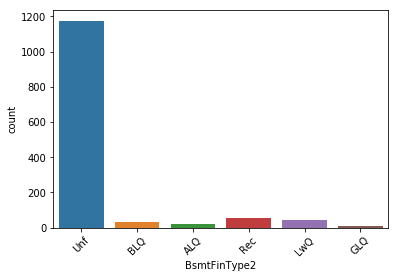

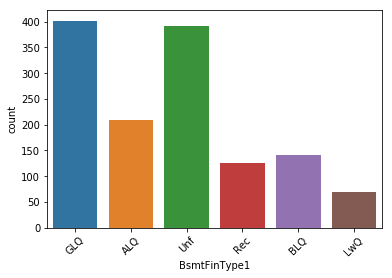

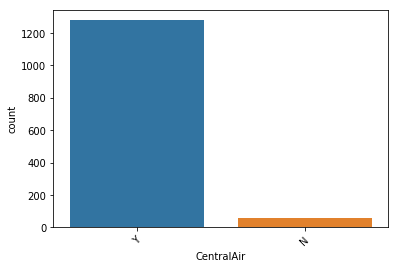

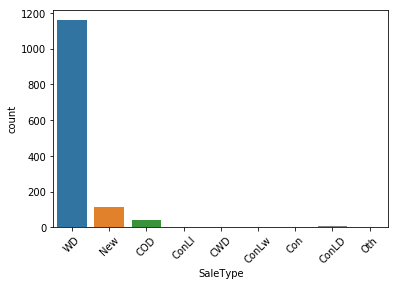

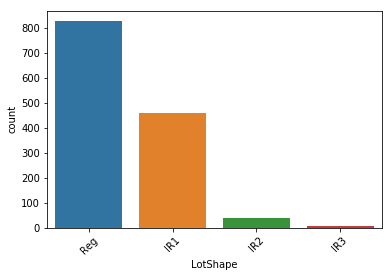

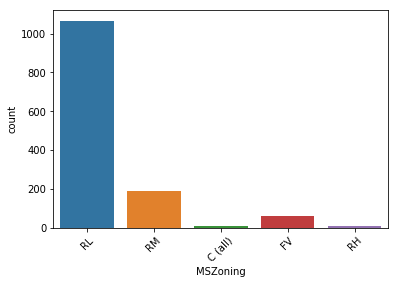

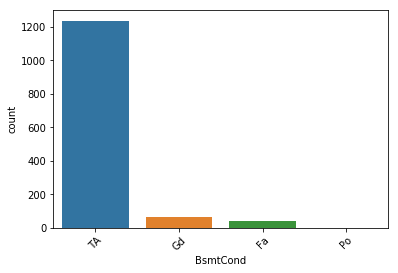

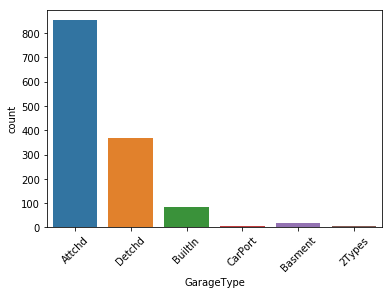

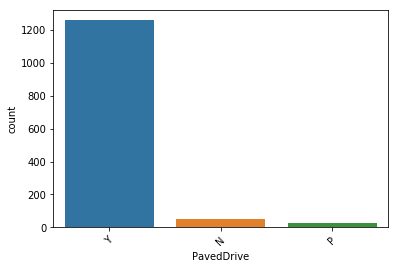

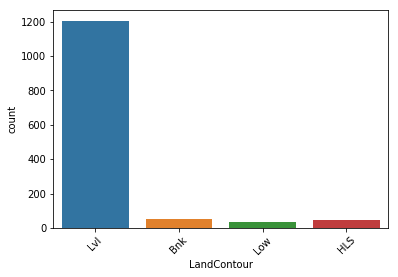

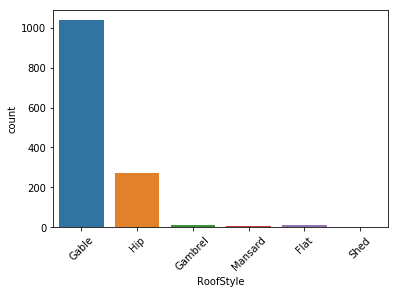

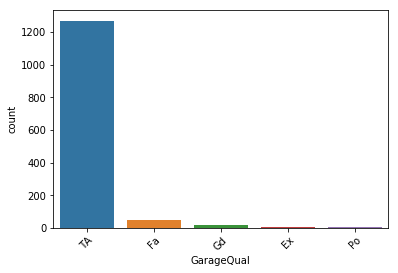

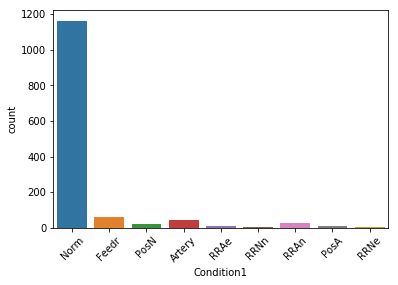

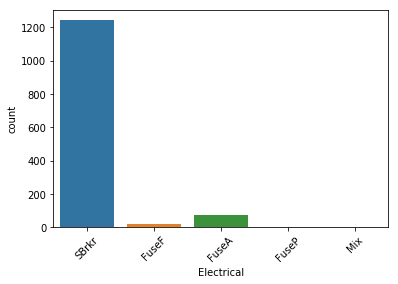

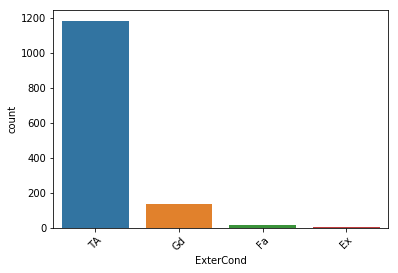

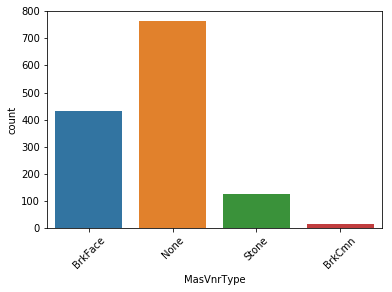

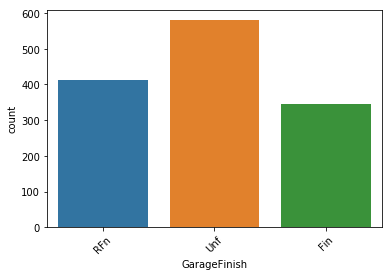

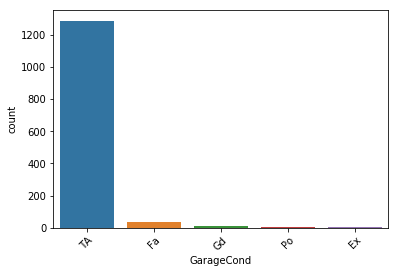

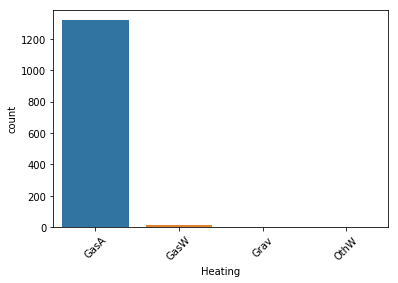

In [14]:
for col in catTxtCols:
    g = sns.countplot(x=col, data=df_dropped)
    plt.setp(g.get_xticklabels(), rotation=45)
    plt.show()

In [15]:
yearCatCols = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

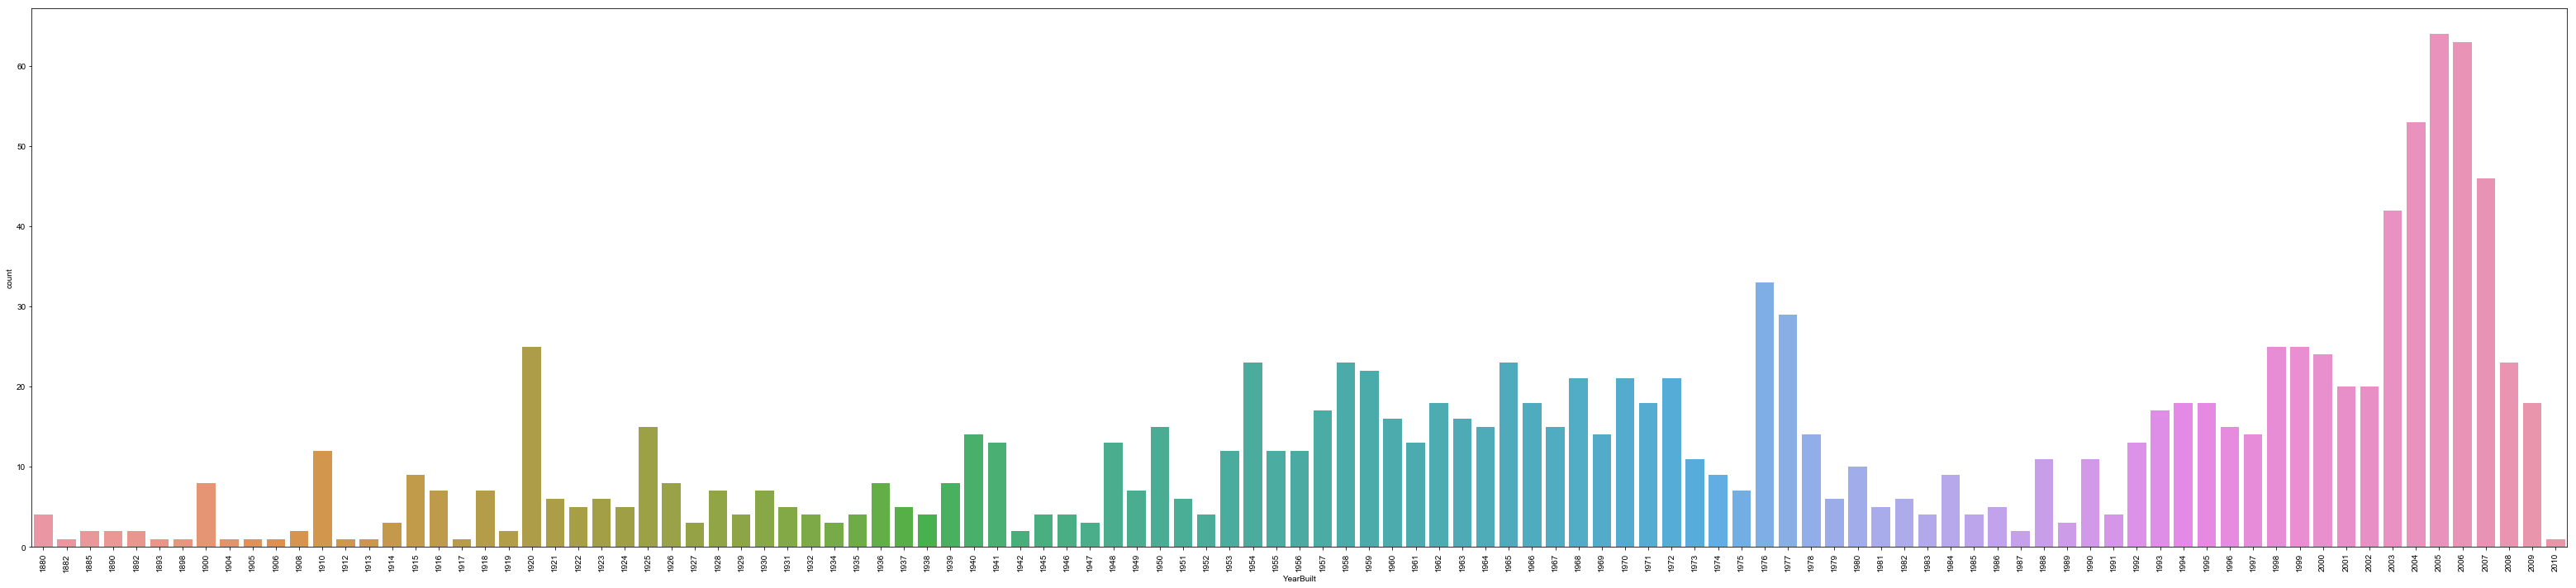

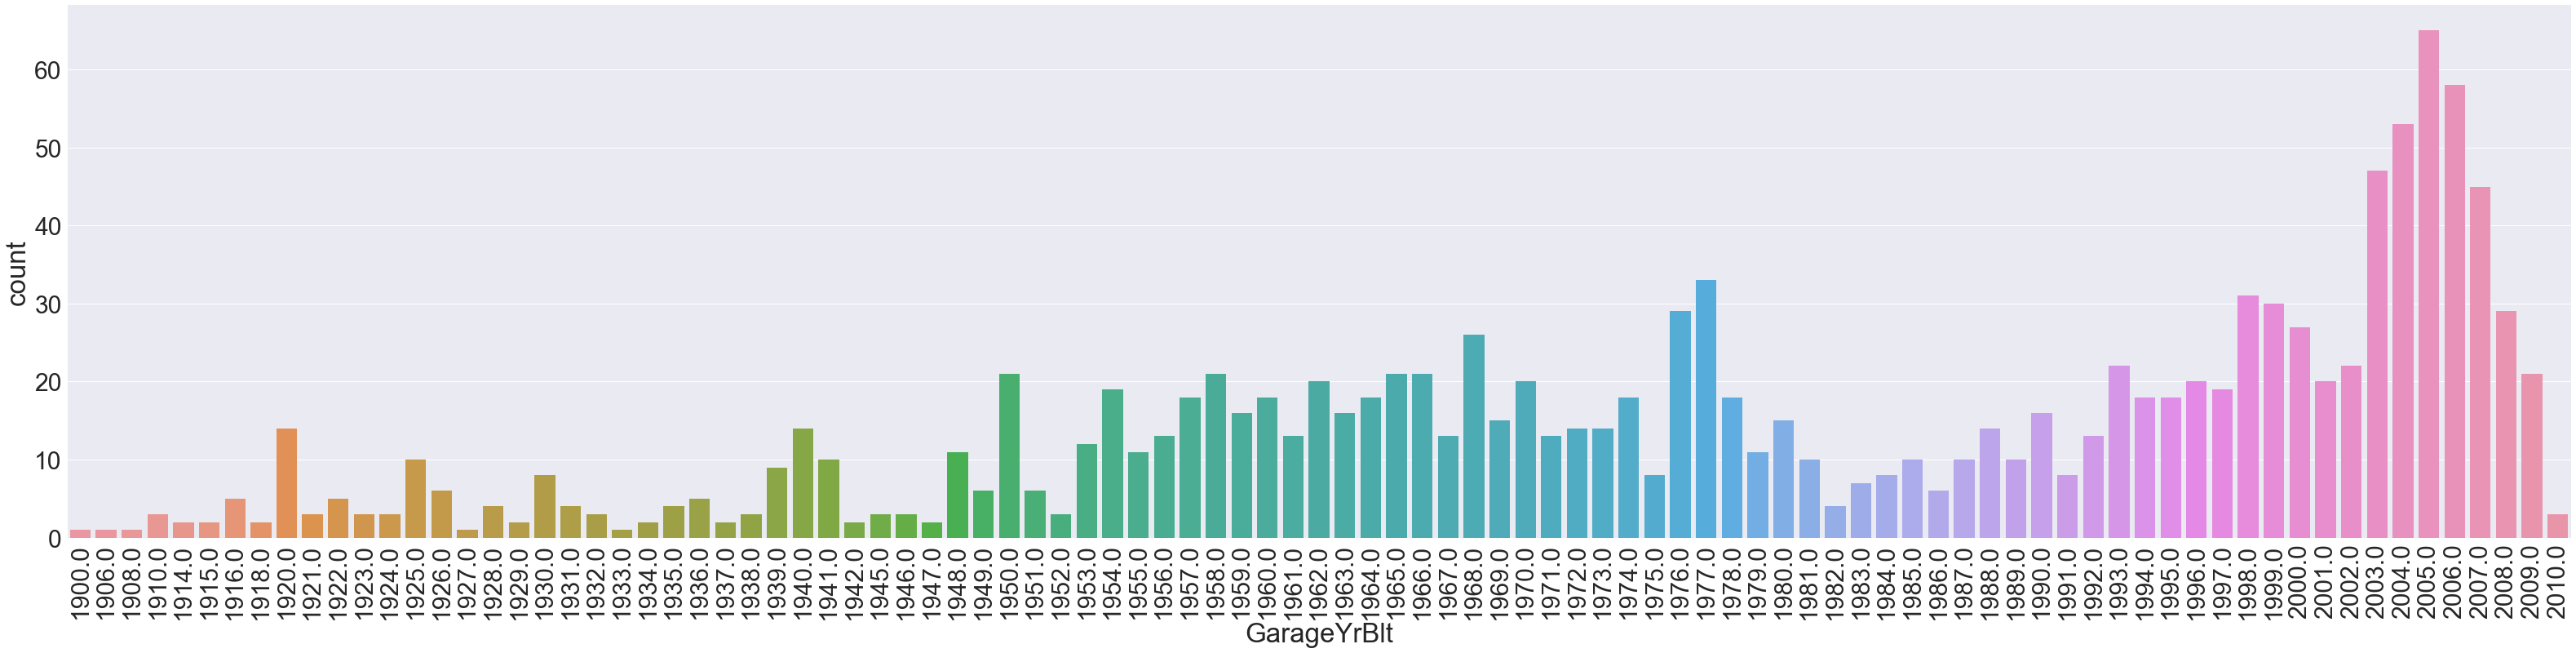

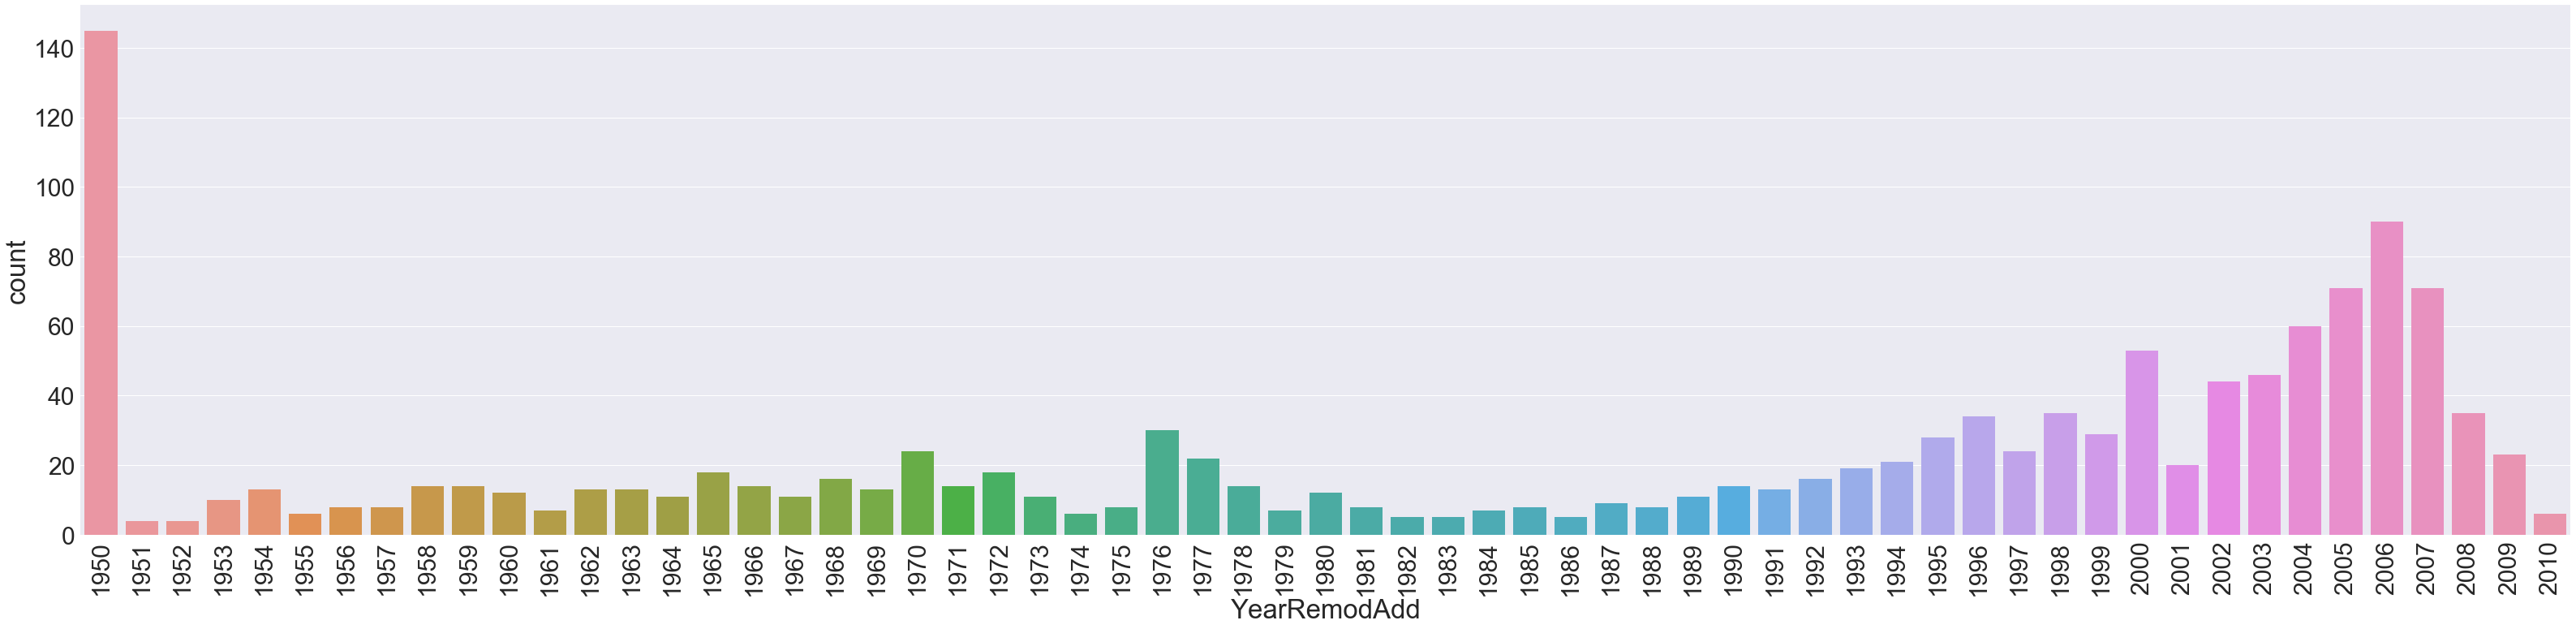

In [16]:
for col in yearCatCols:
    f, ax = plt.subplots(figsize=(55,12))
    sns.set(font_scale = 3)
    fig = sns.countplot(x=col, data=df_dropped)
    x = plt.xticks(rotation=90)

In [17]:
numCatCols = ['Fireplaces',
              'OverallQual',
              'OverallCond',
              'BsmtFullBath',
              'BsmtHalfBath',
              'FullBath',
              'MoSold',
              'GarageCars',
              'KitchenAbvGr',
              'BedroomAbvGr',
              'YrSold',
             'TotRmsAbvGrd',
             'HalfBath',
             'MSSubClass']

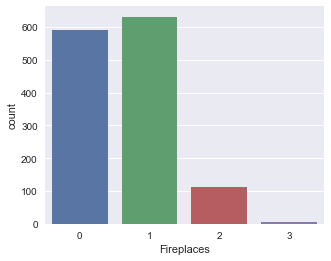

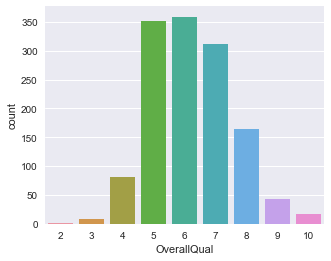

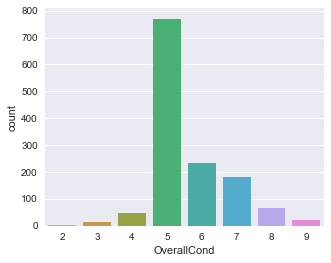

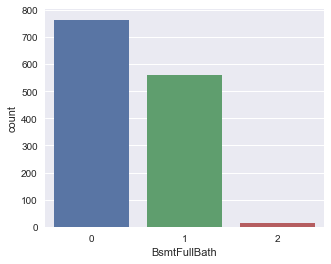

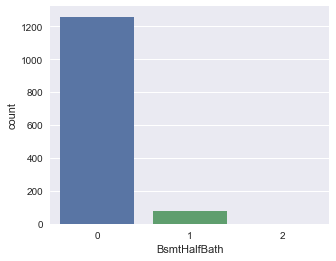

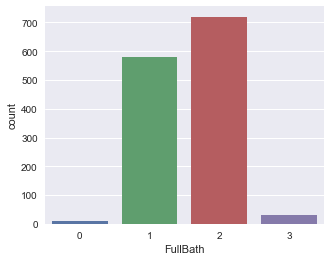

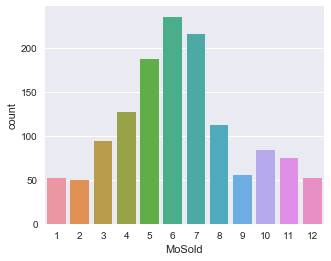

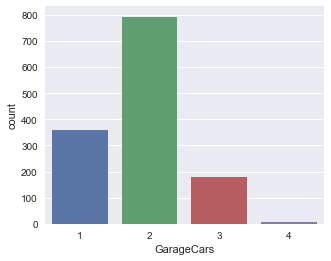

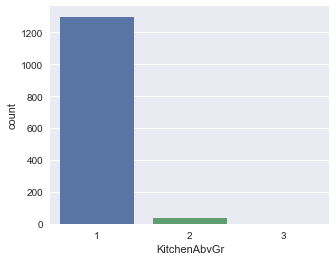

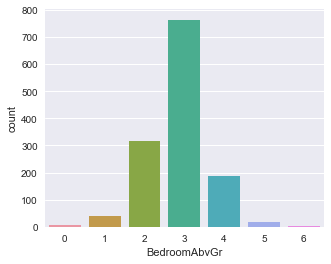

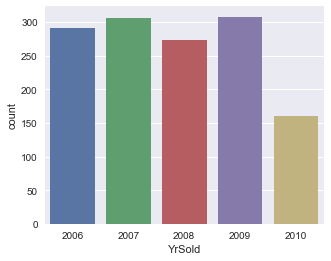

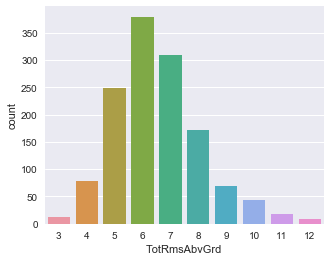

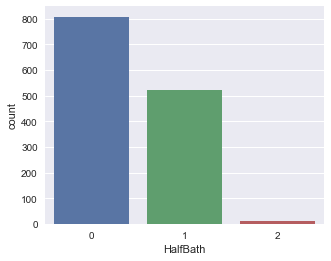

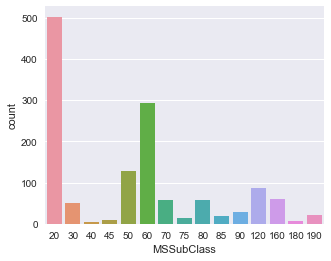

In [18]:
for col in numCatCols:
    sns.set(font_scale = 1)
    f, ax = plt.subplots(figsize=(5,4))
    fig2 = sns.countplot(x=col, data=df_dropped)
    #x = plt.xticks(rotation=90)
    plt.show()

In [19]:
def BoxHist(column, df_focus):
    
    sns.set()
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=10)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

In [20]:
contCols = list(set(numCols)-set(numCatCols)-set(yearCatCols))

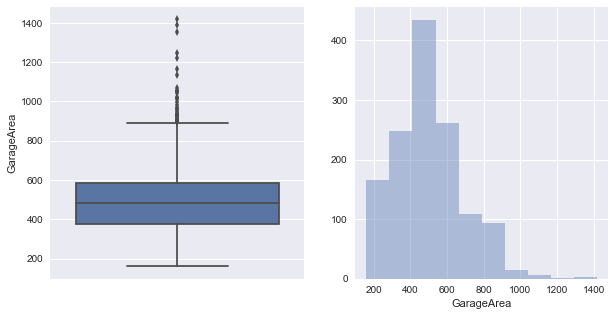

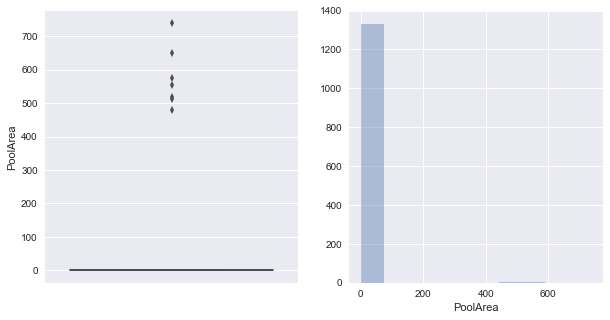

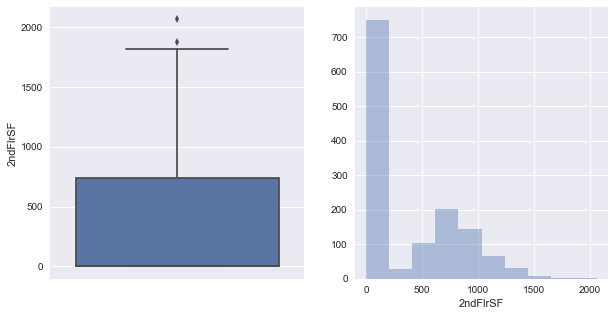

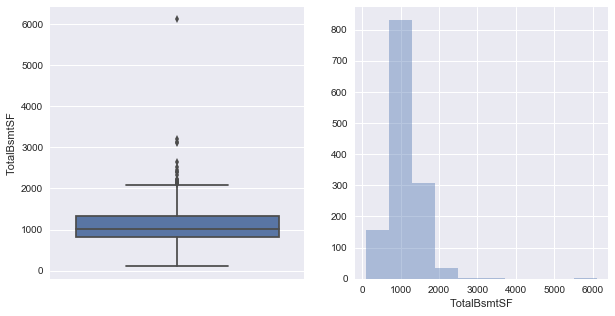

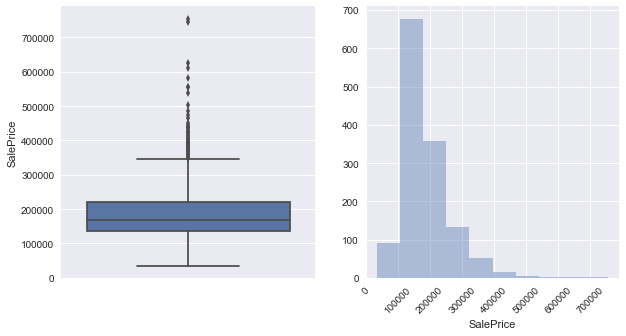

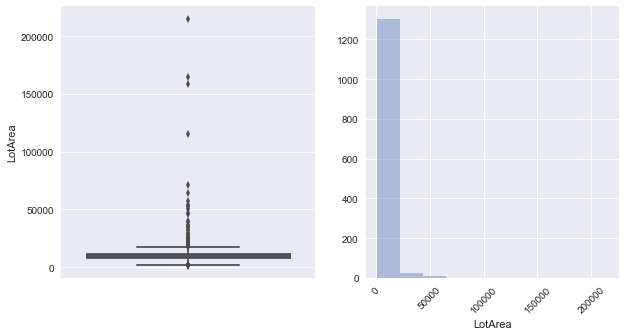

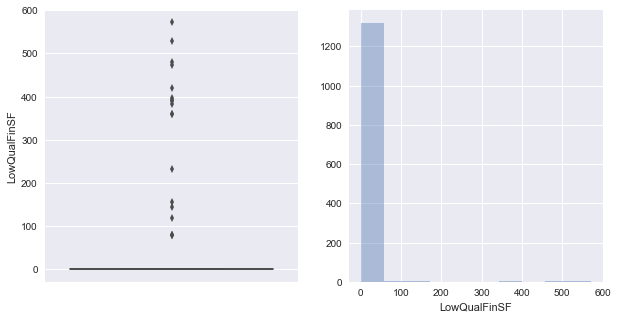

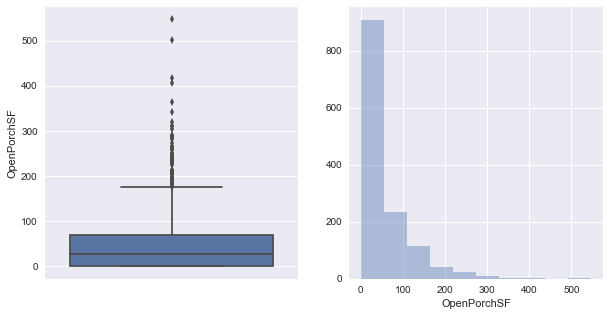

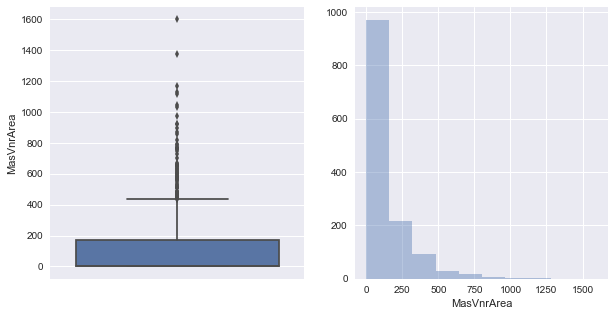

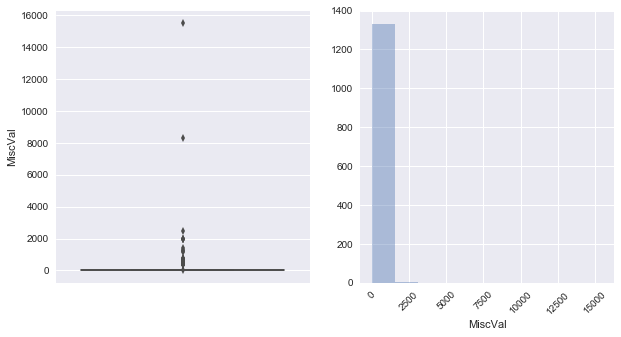

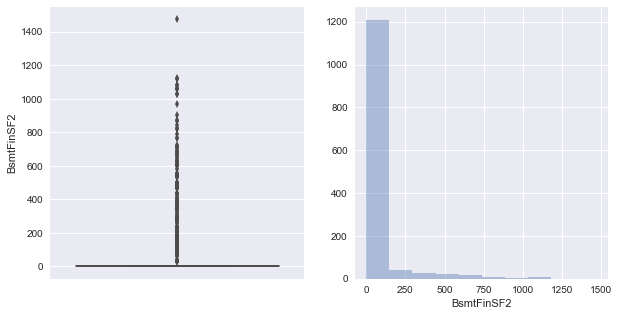

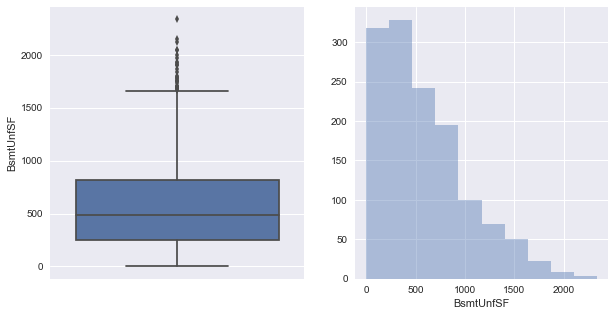

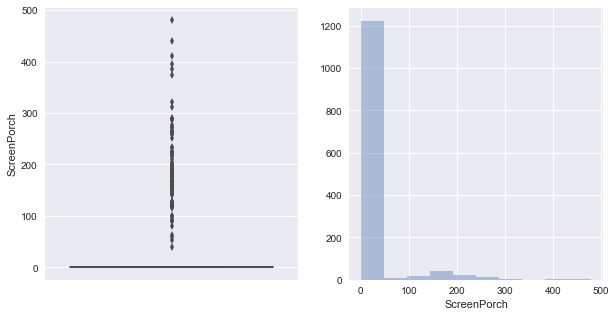

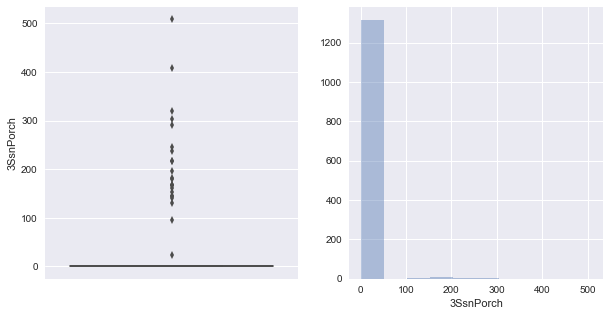

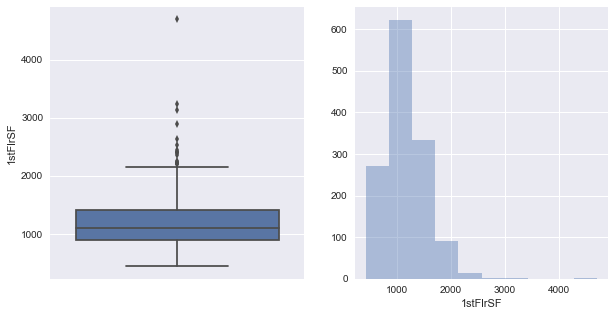

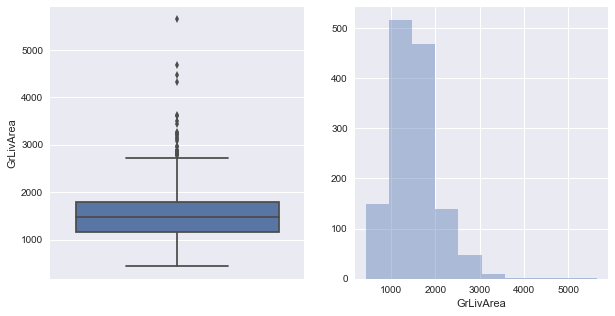

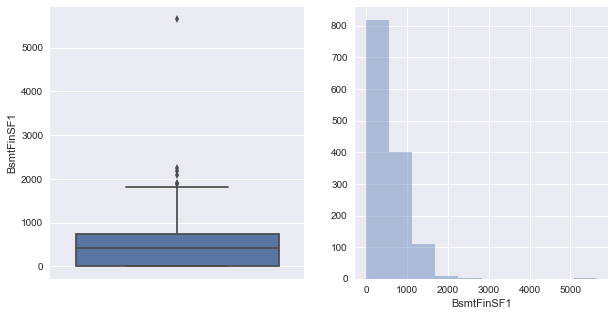

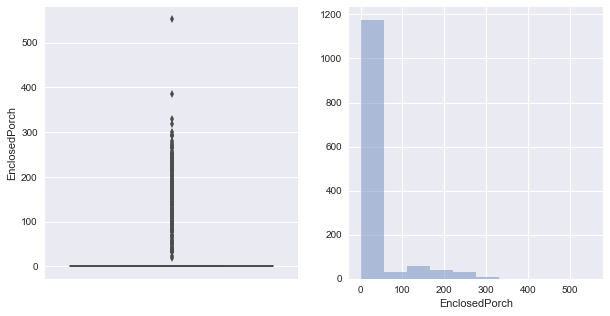

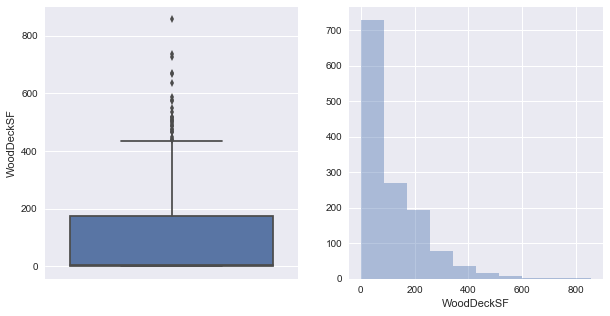

In [21]:
for col in contCols:
    BoxHist(col,df_dropped)

In [22]:
contCols

['GarageArea',
 'PoolArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'SalePrice',
 'LotArea',
 'LowQualFinSF',
 'OpenPorchSF',
 'MasVnrArea',
 'MiscVal',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'ScreenPorch',
 '3SsnPorch',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFinSF1',
 'EnclosedPorch',
 'WoodDeckSF']

In [23]:
corrmat = df_dropped[contCols].corr()
display(corrmat[abs(corrmat.SalePrice) >= .30].SalePrice.sort_values(ascending=False))
contColsHighCorr = corrmat[abs(corrmat.SalePrice) >= .30].SalePrice.sort_values(ascending=False).index
contColsLowCorr = list(set(contCols)-set(contColsHighCorr))

SalePrice      1.000000
GrLivArea      0.711706
GarageArea     0.607535
1stFlrSF       0.604714
TotalBsmtSF    0.602042
MasVnrArea     0.465811
BsmtFinSF1     0.359677
OpenPorchSF    0.322786
2ndFlrSF       0.311354
WoodDeckSF     0.305983
Name: SalePrice, dtype: float64

In [24]:
#df_dropped['ScreenPorch']
df_dropped[contCols].shape

(1338, 19)

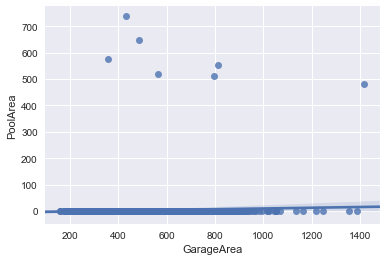

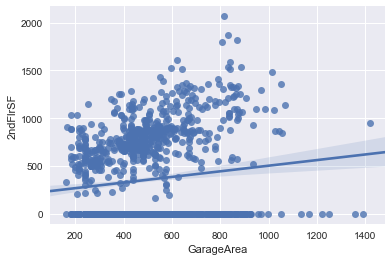

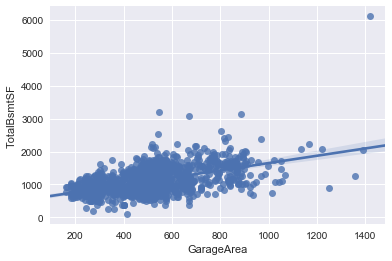

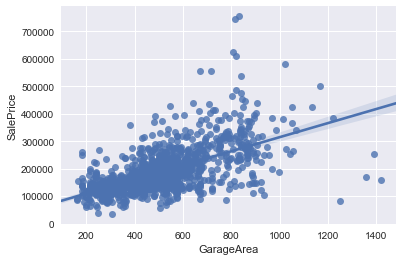

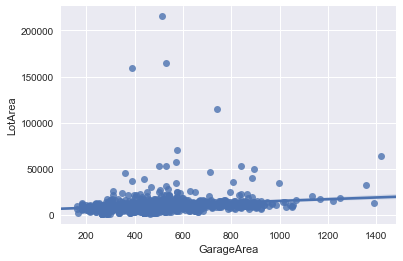

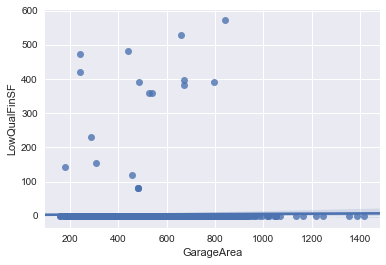

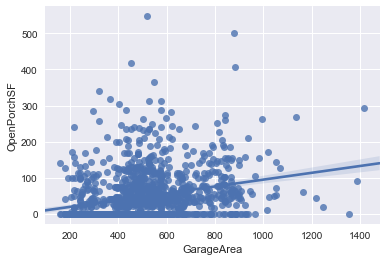

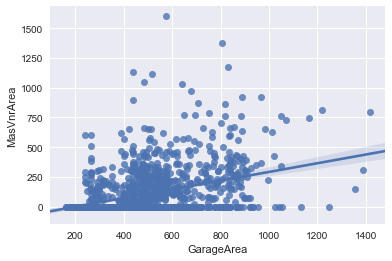

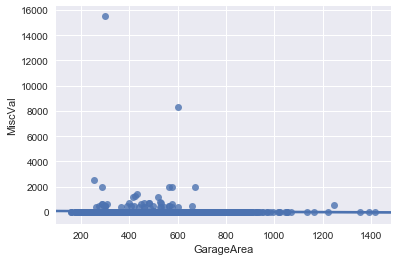

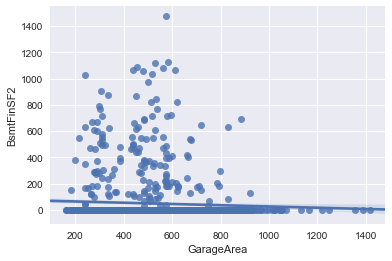

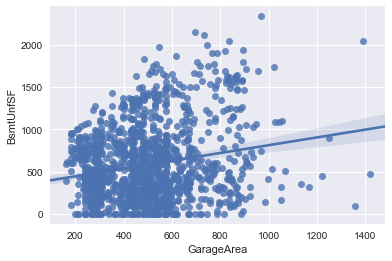

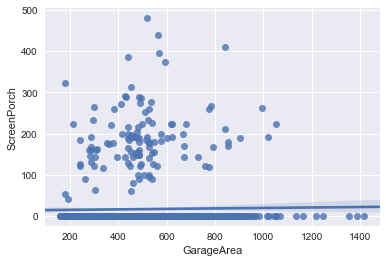

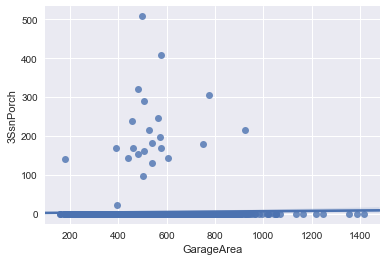

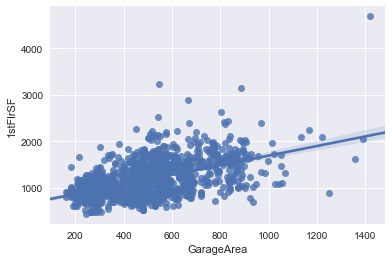

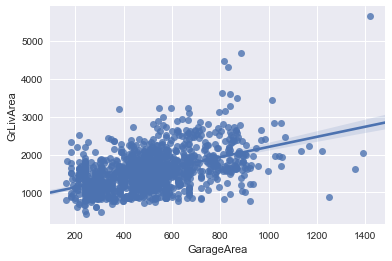

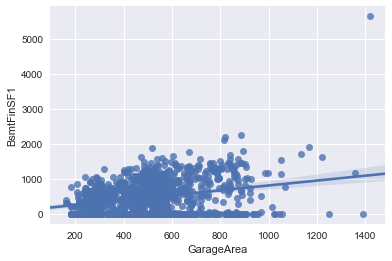

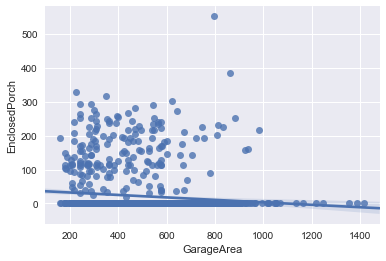

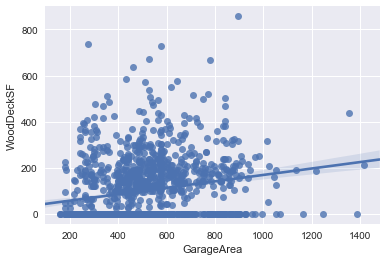

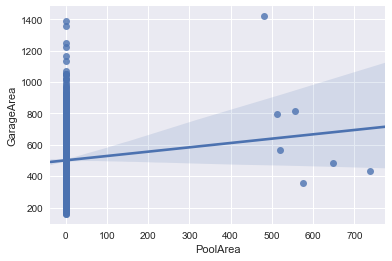

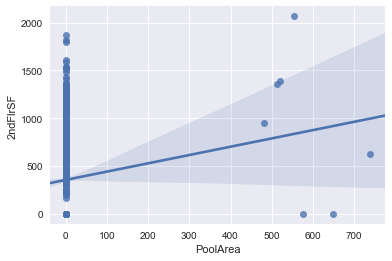

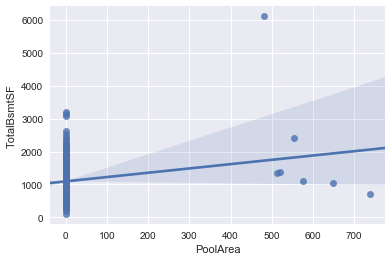

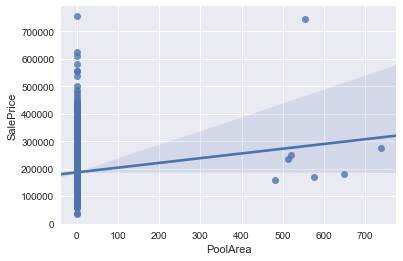

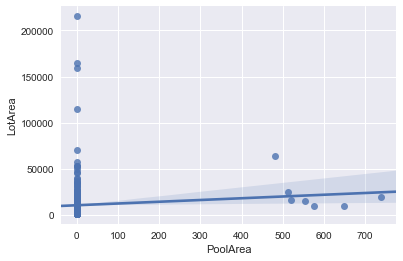

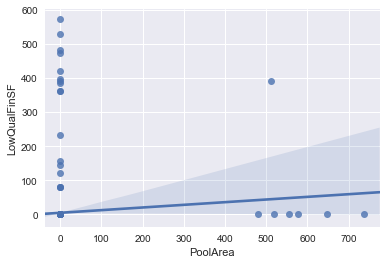

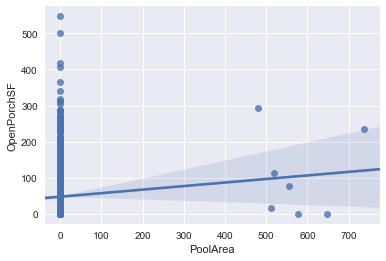

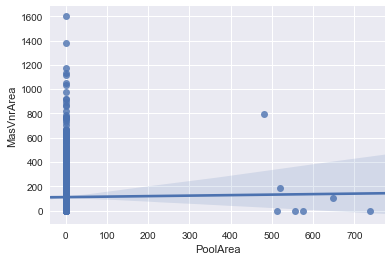

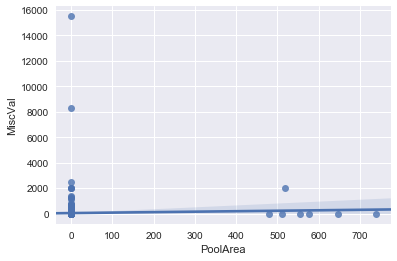

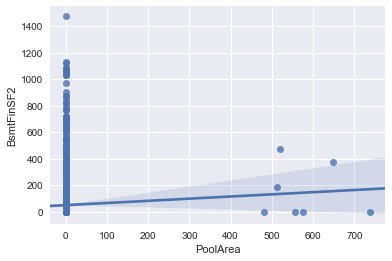

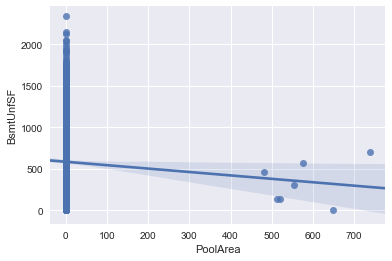

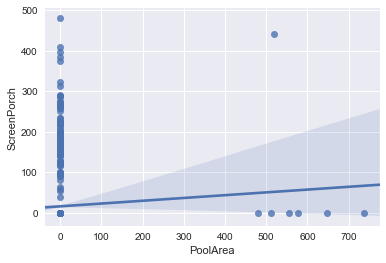

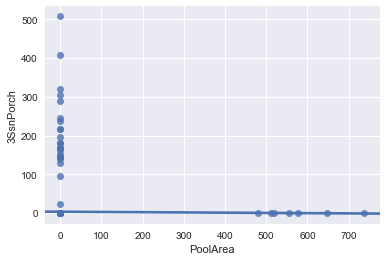

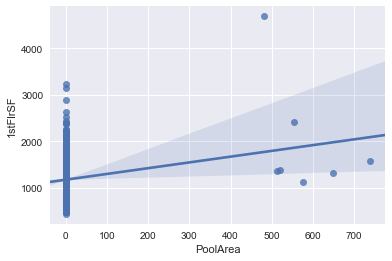

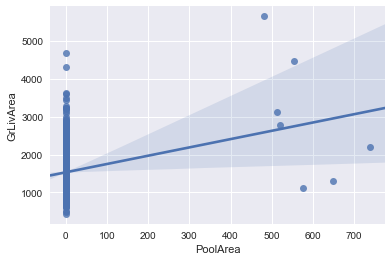

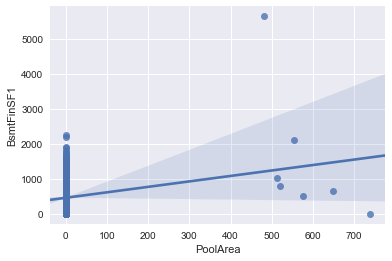

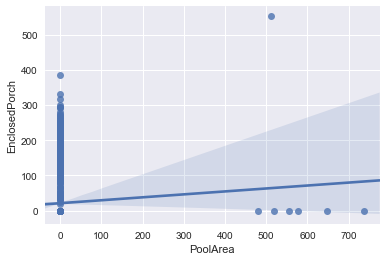

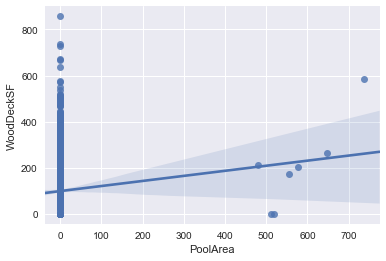

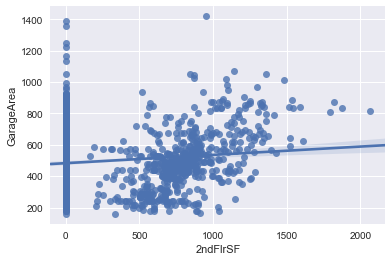

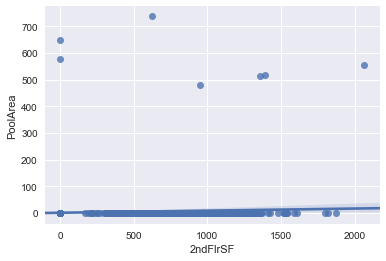

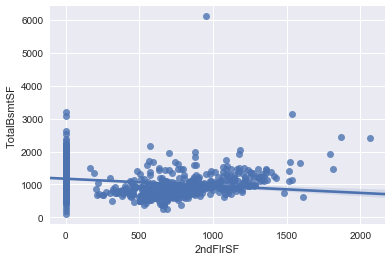

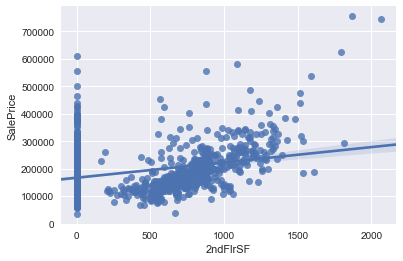

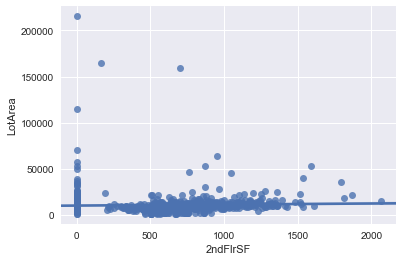

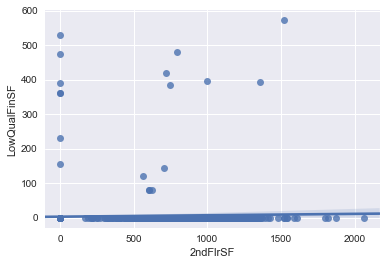

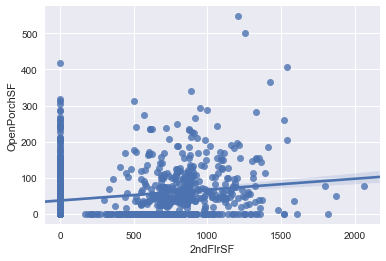

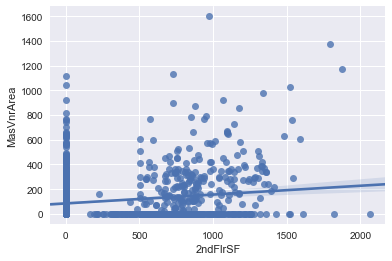

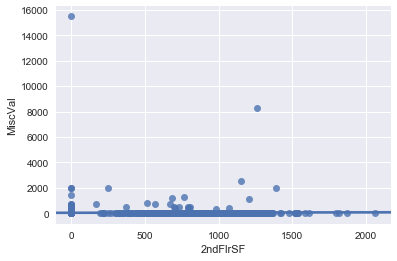

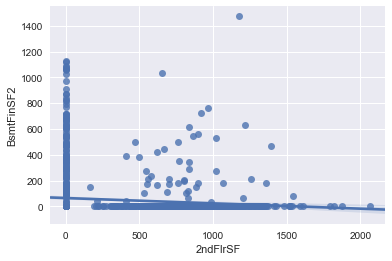

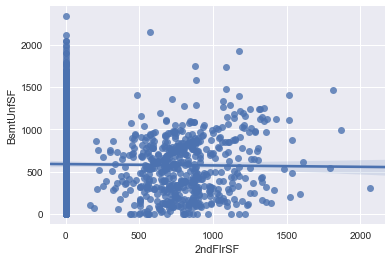

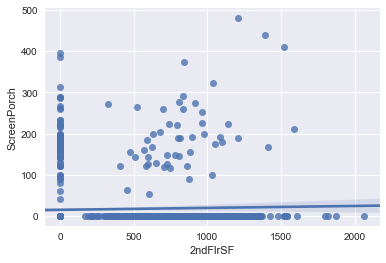

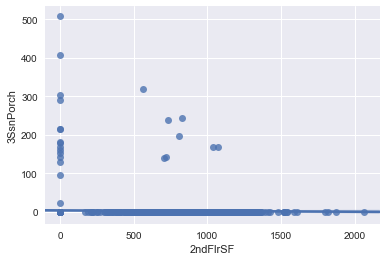

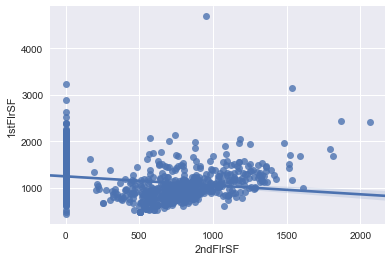

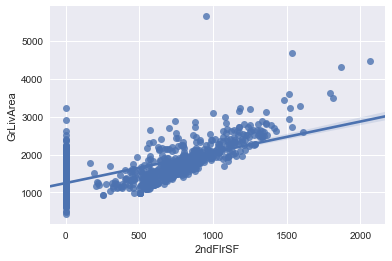

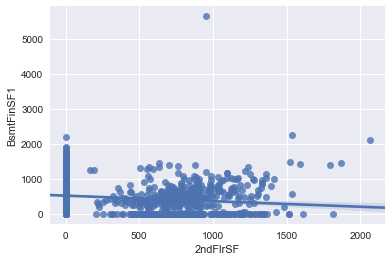

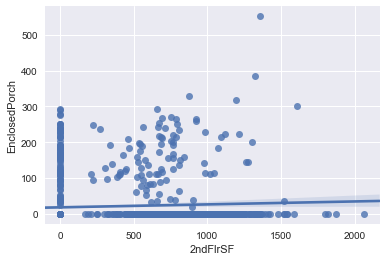

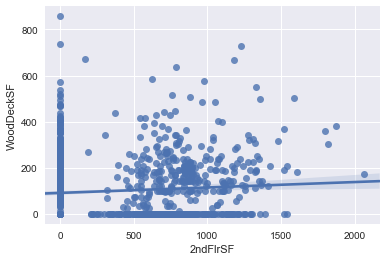

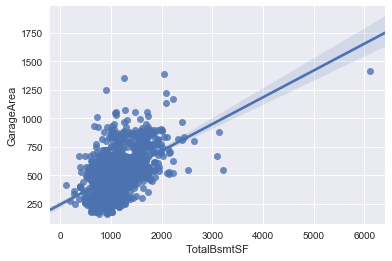

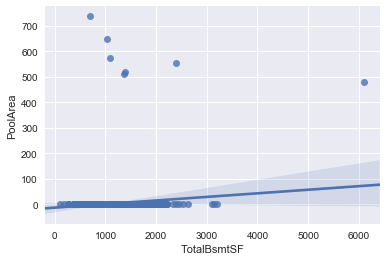

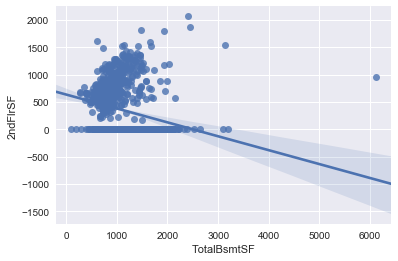

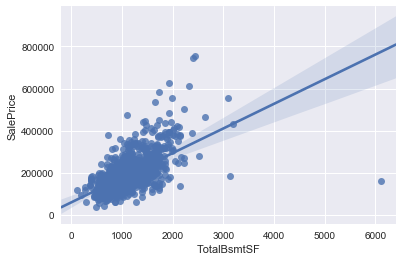

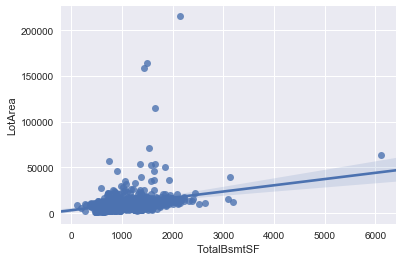

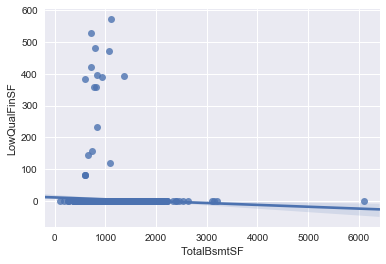

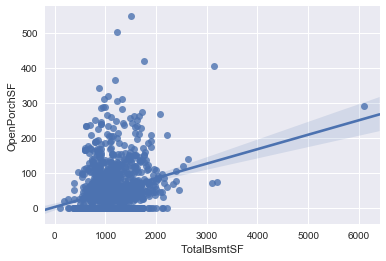

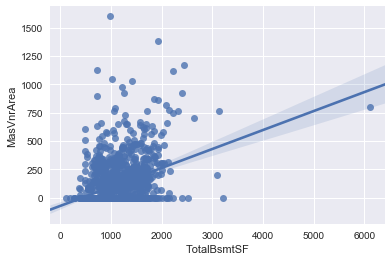

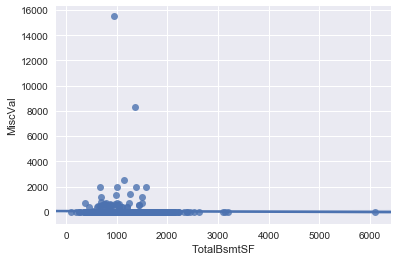

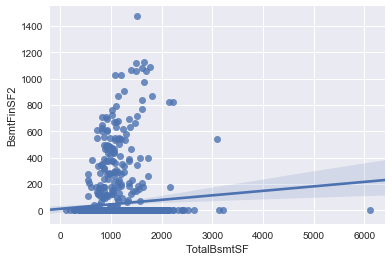

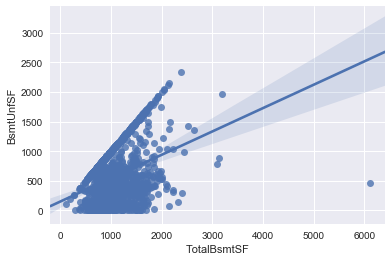

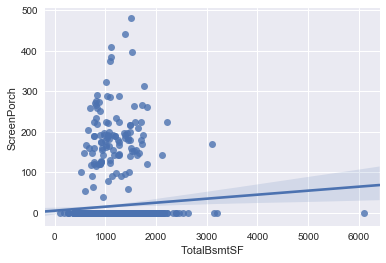

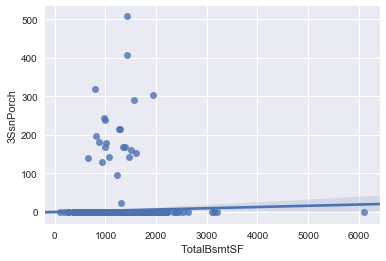

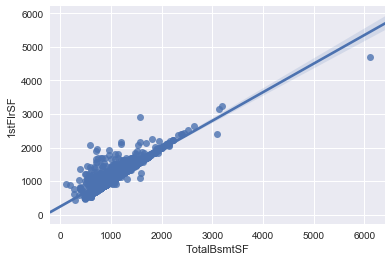

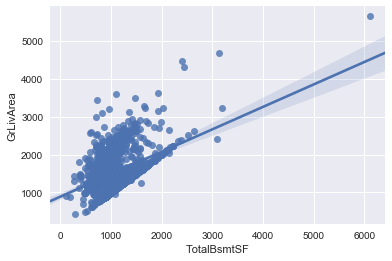

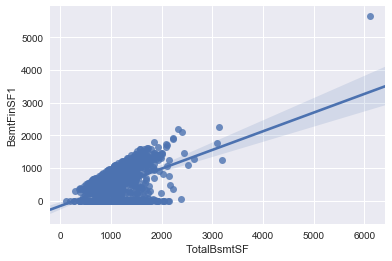

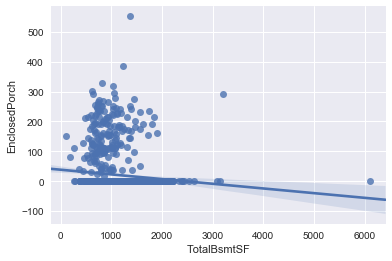

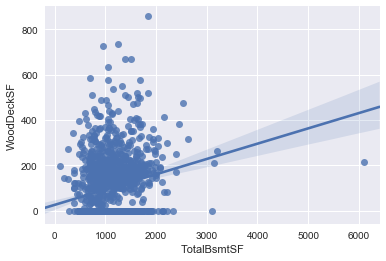

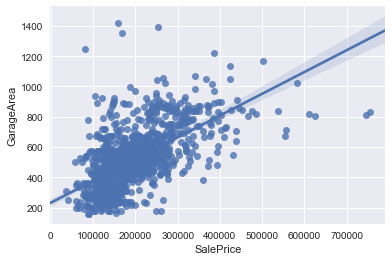

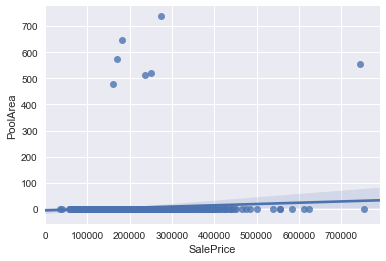

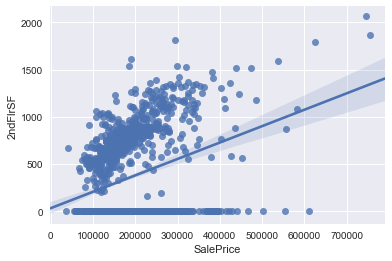

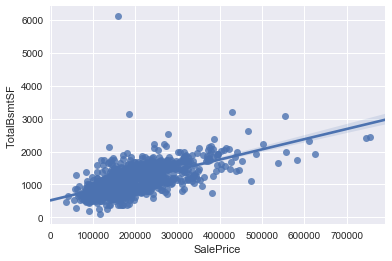

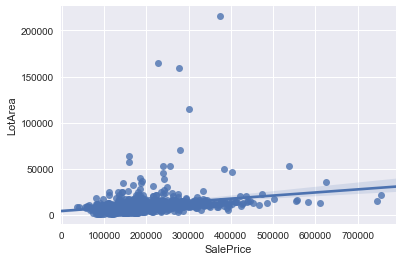

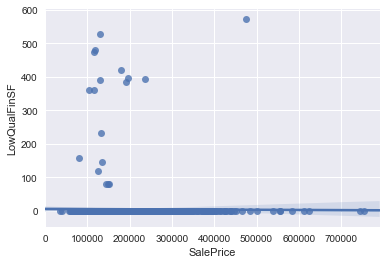

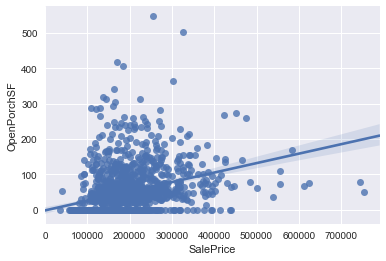

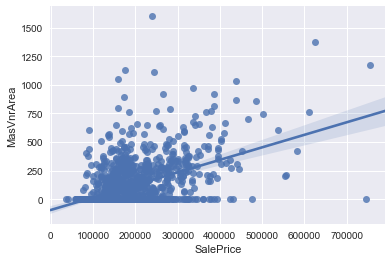

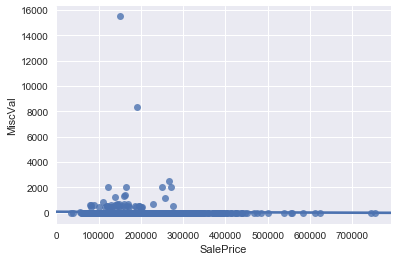

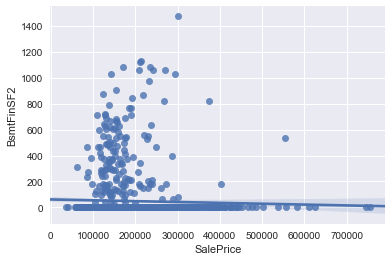

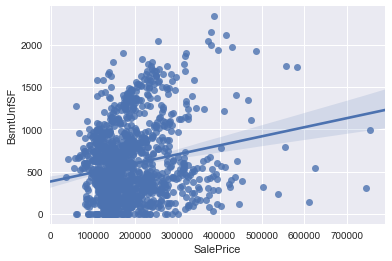

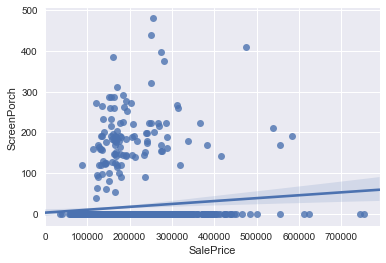

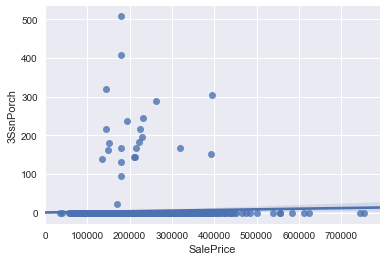

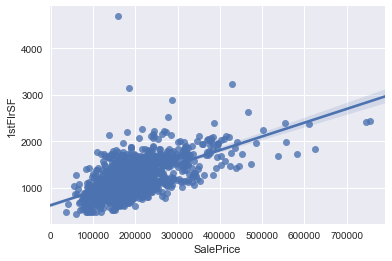

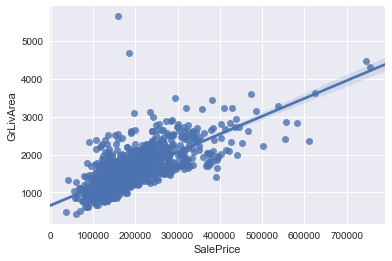

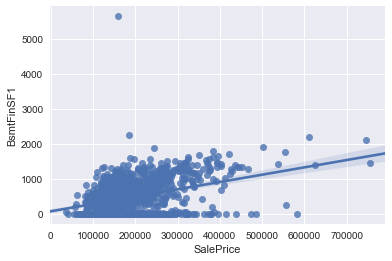

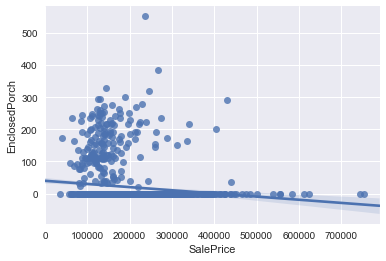

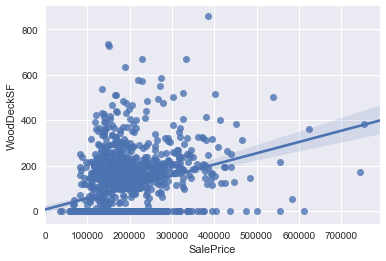

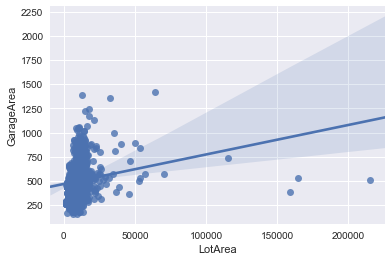

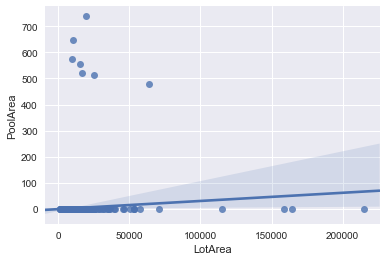

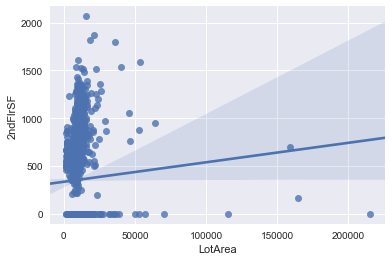

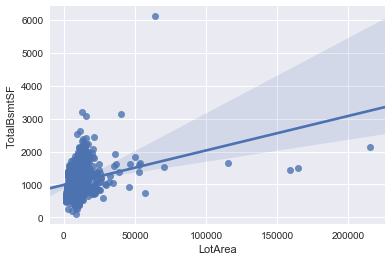

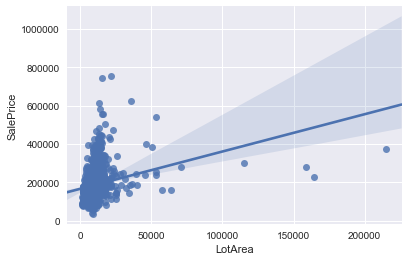

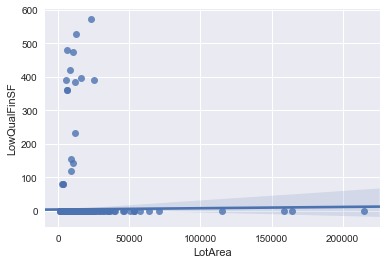

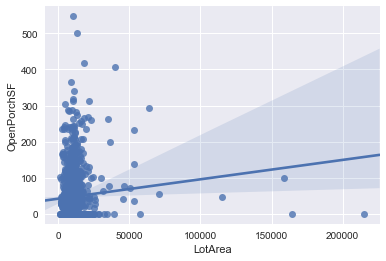

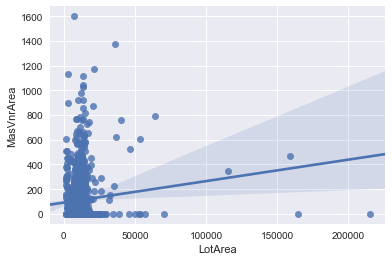

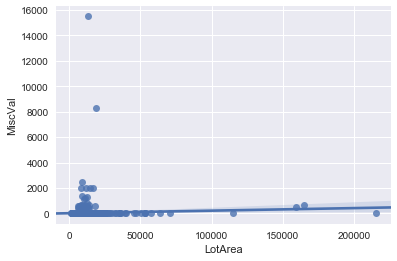

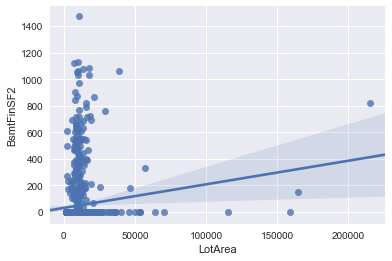

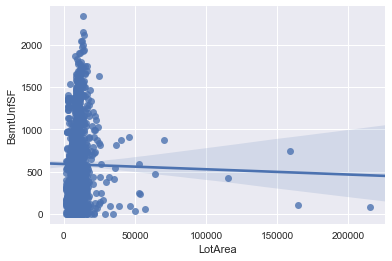

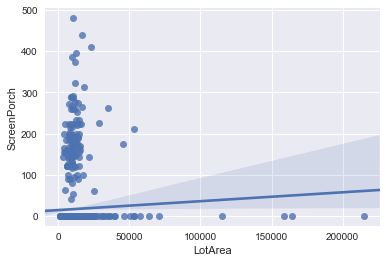

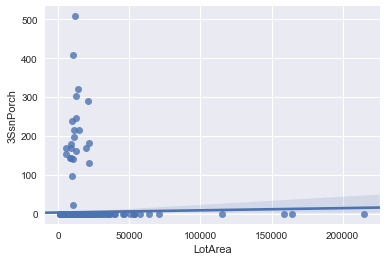

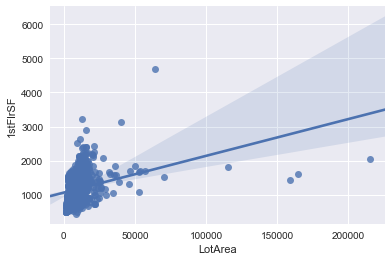

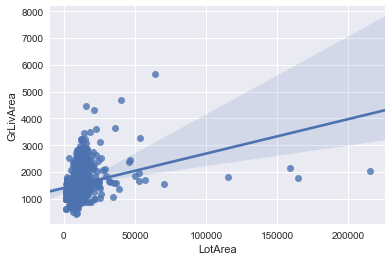

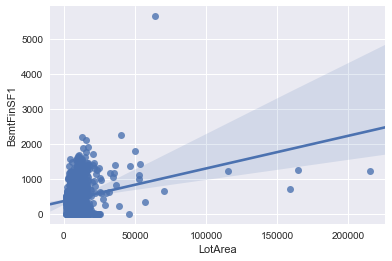

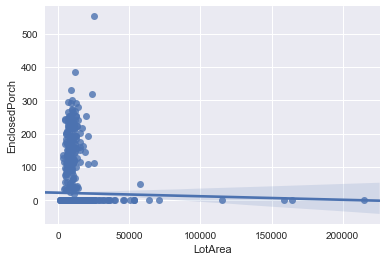

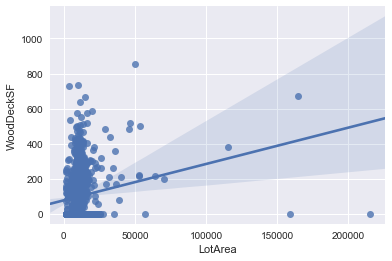

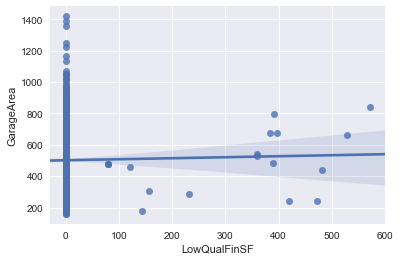

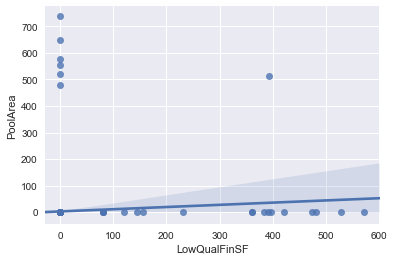

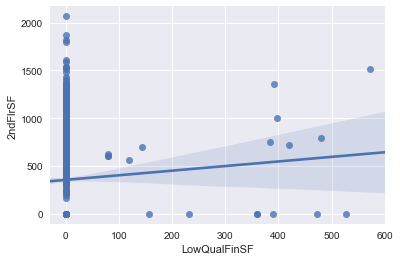

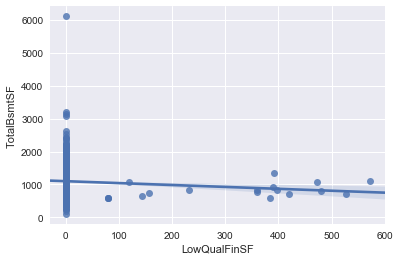

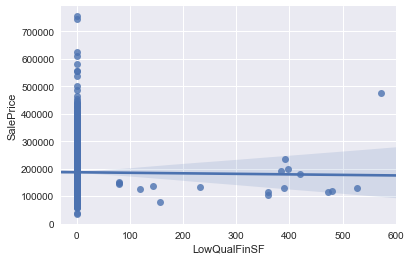

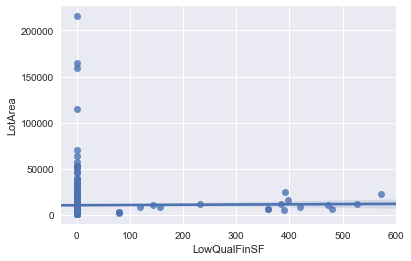

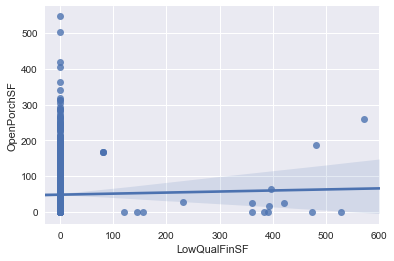

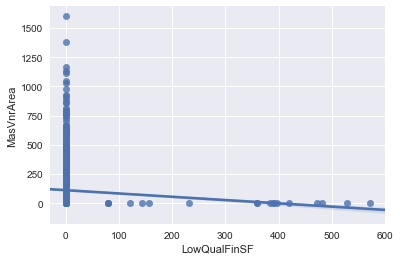

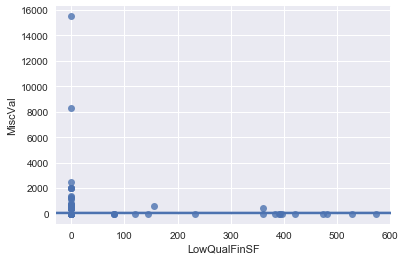

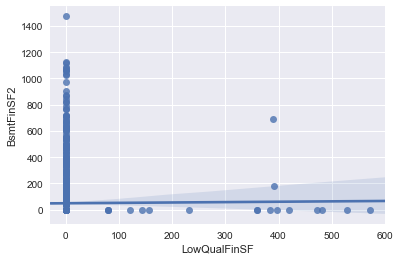

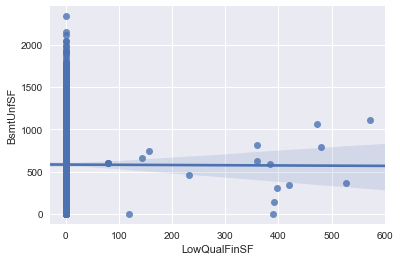

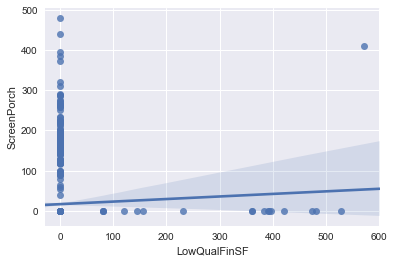

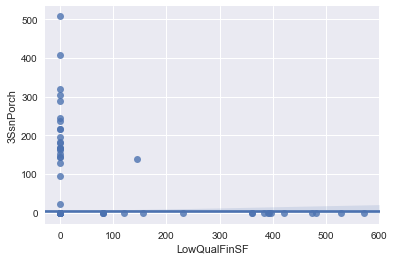

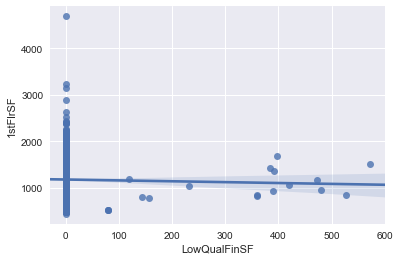

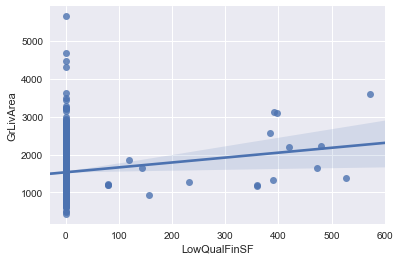

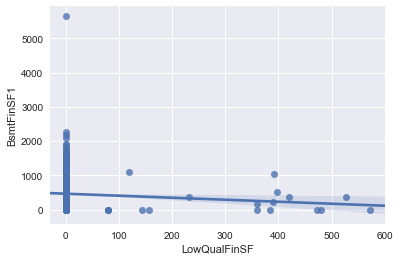

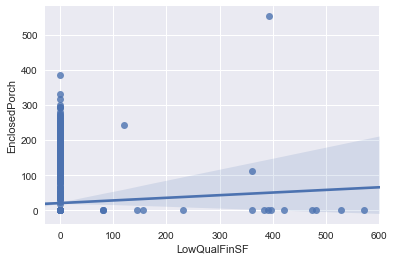

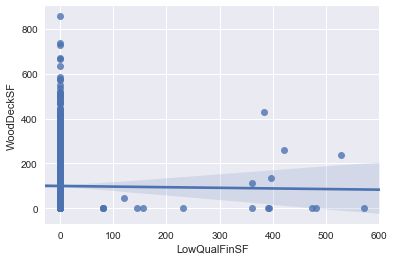

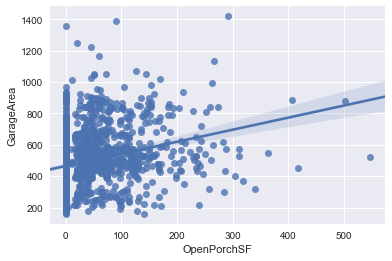

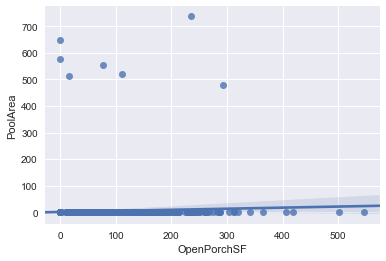

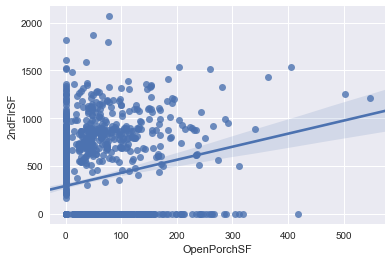

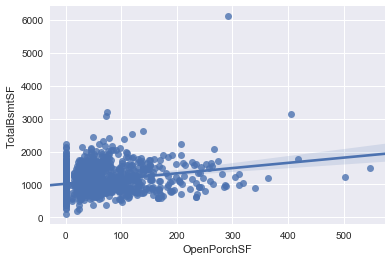

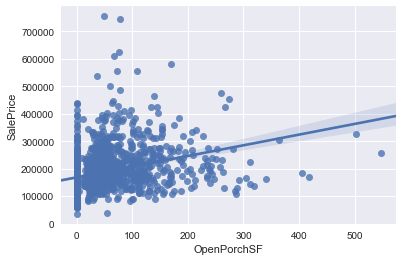

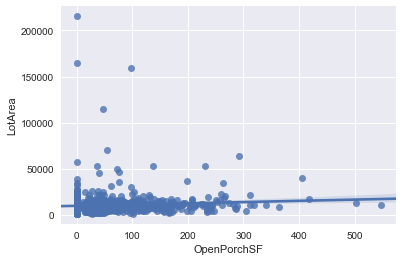

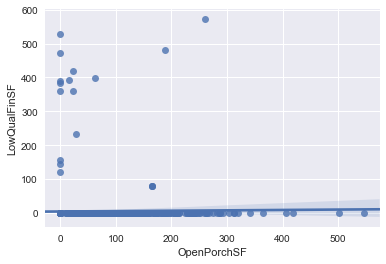

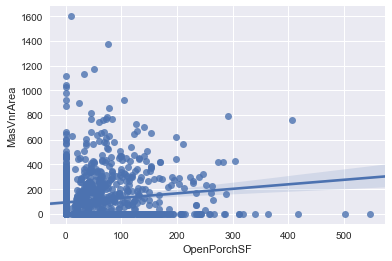

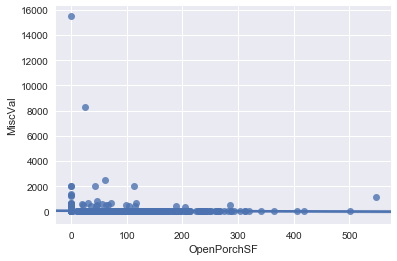

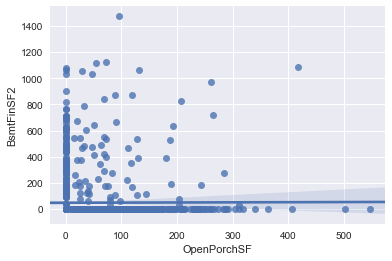

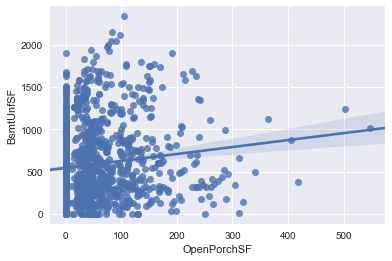

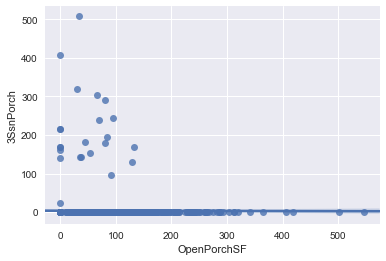

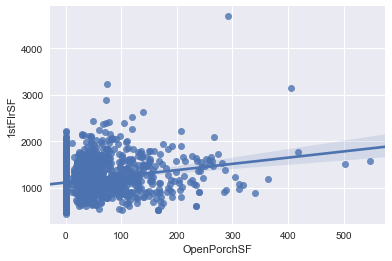

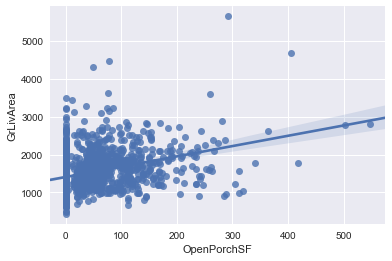

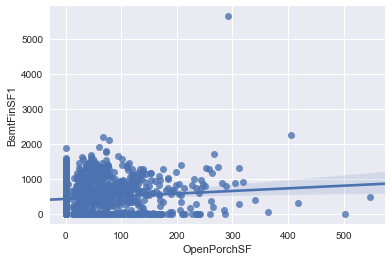

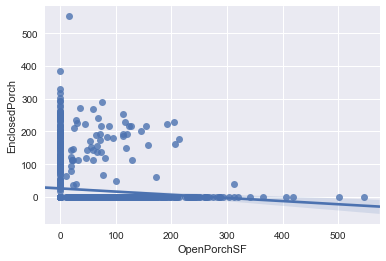

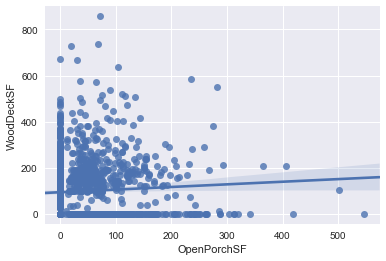

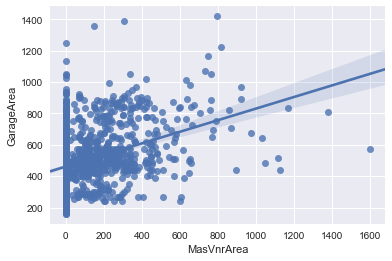

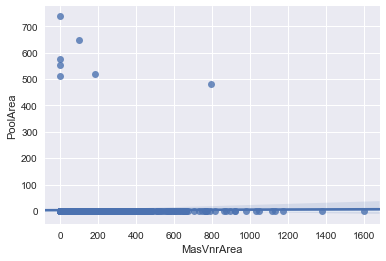

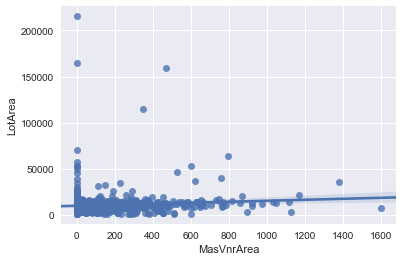

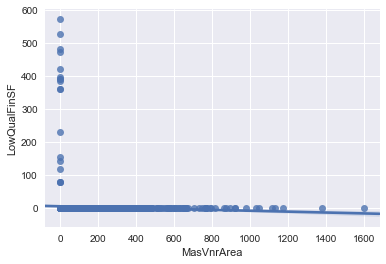

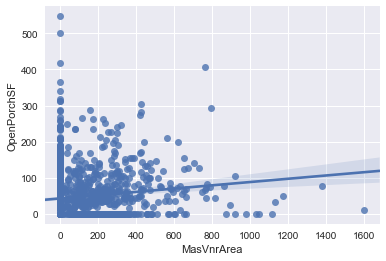

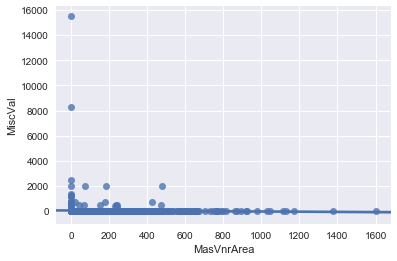

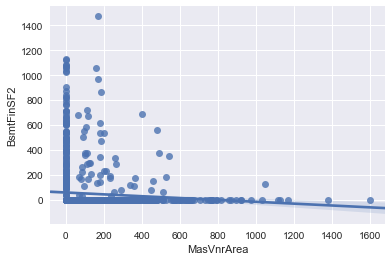

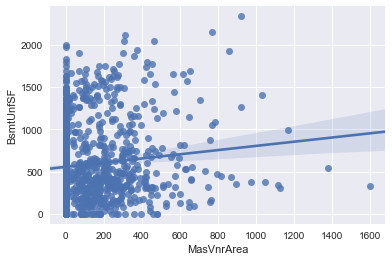

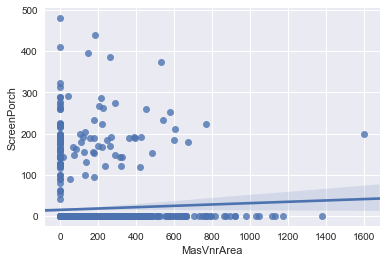

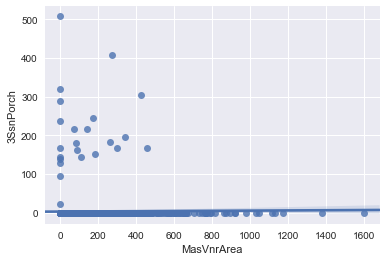

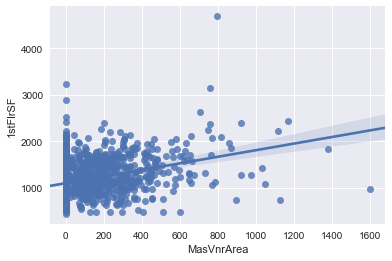

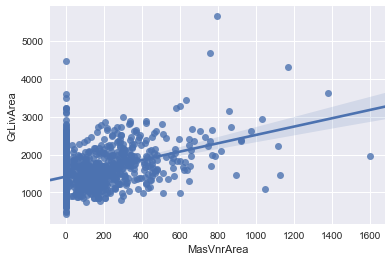

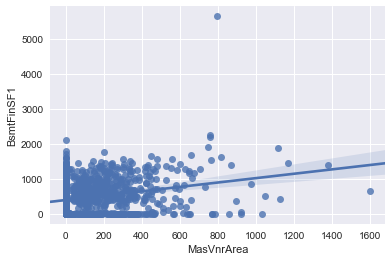

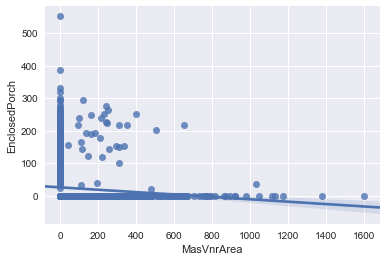

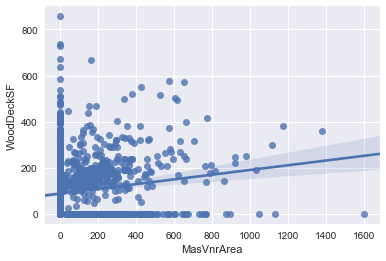

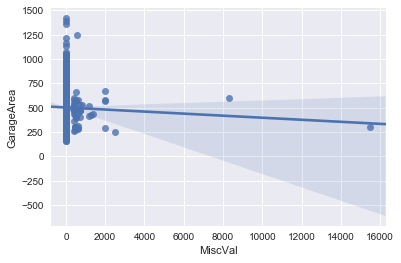

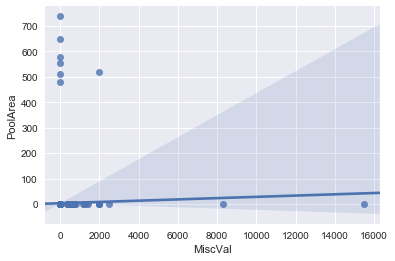

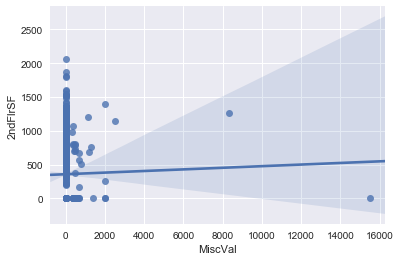

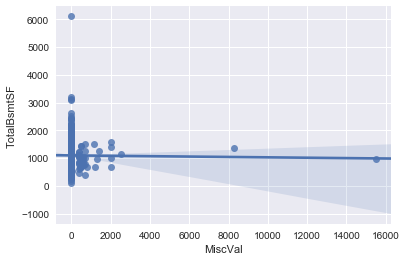

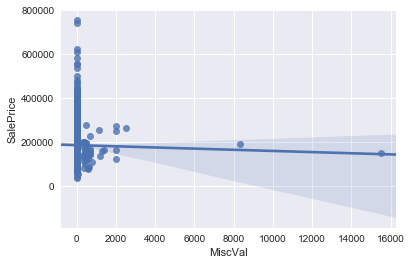

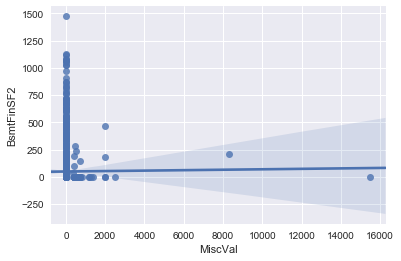

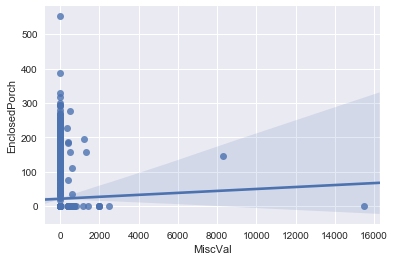

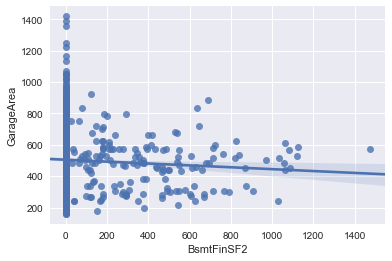

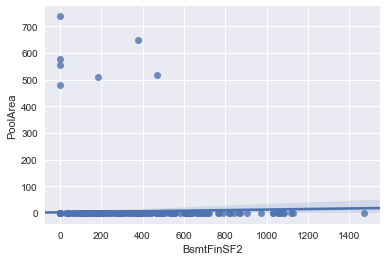

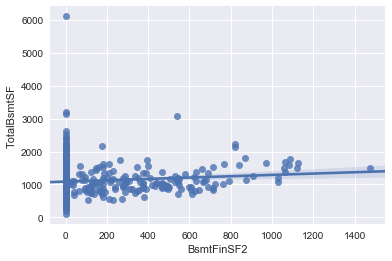

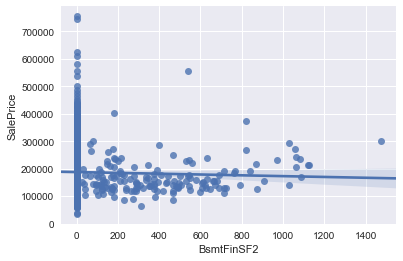

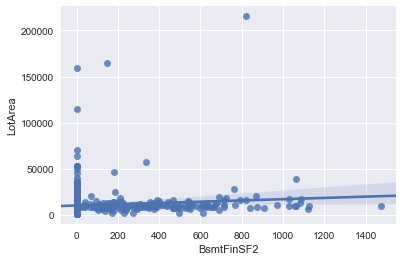

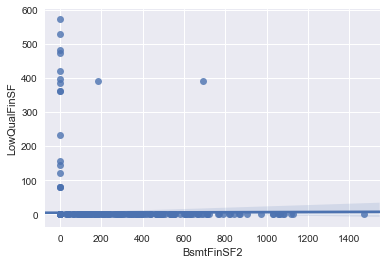

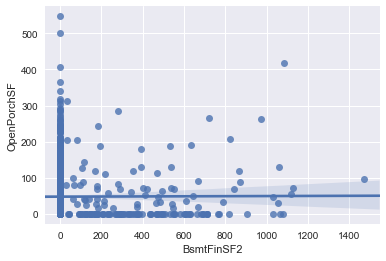

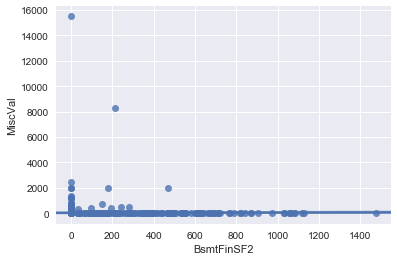

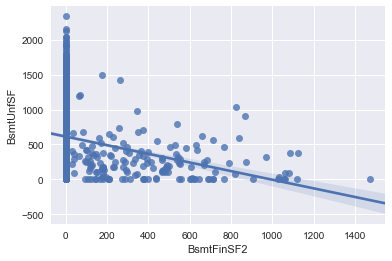

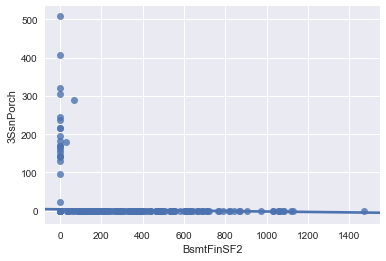

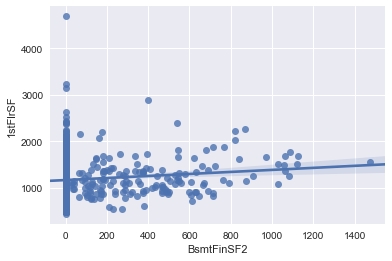

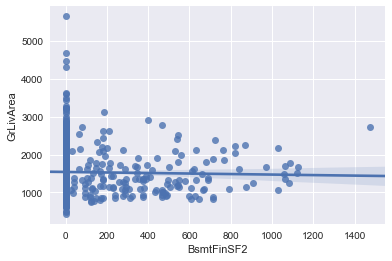

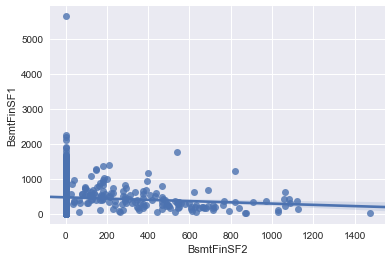

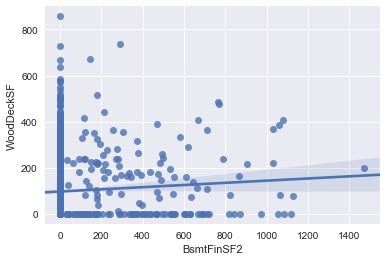

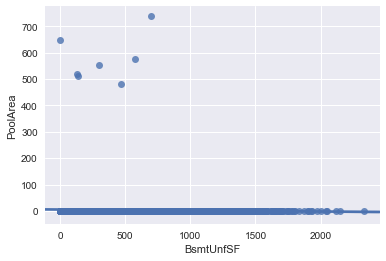

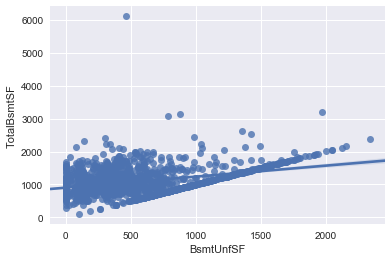

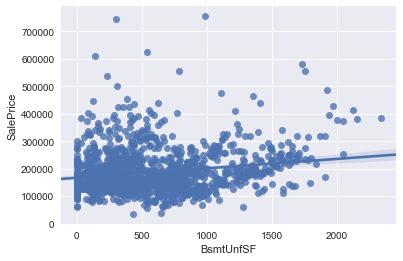

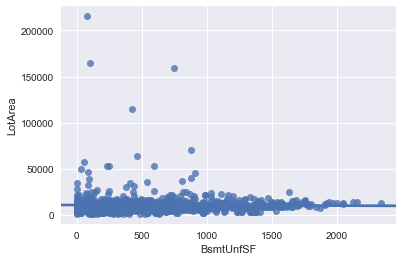

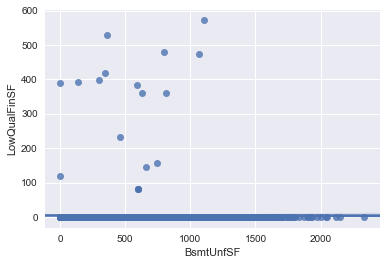

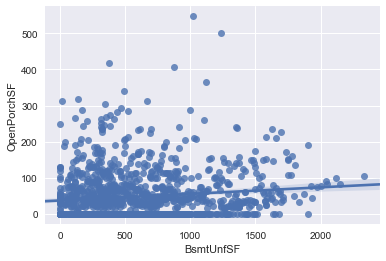

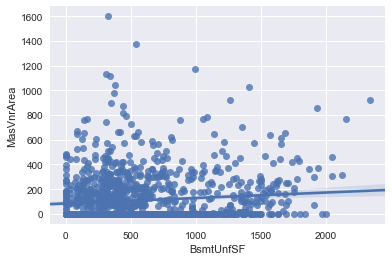

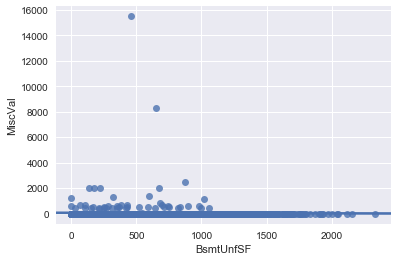

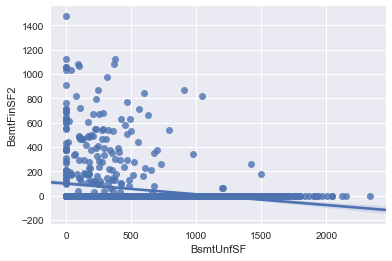

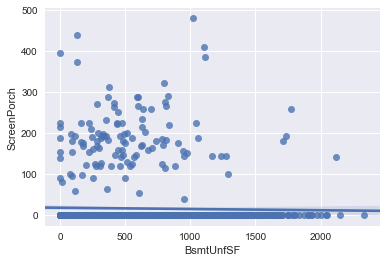

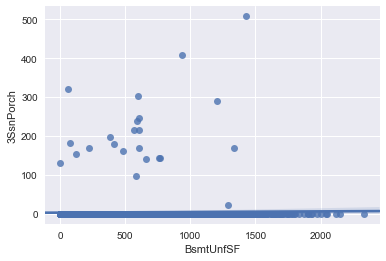

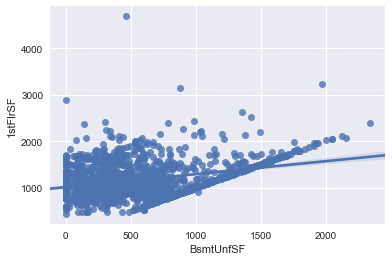

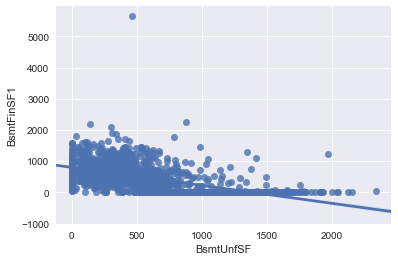

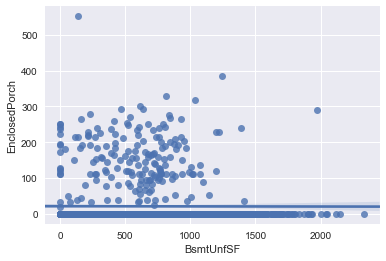

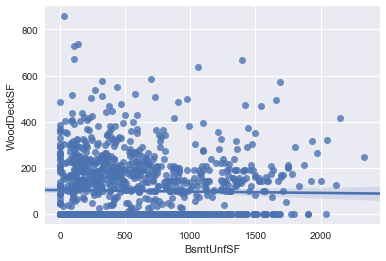

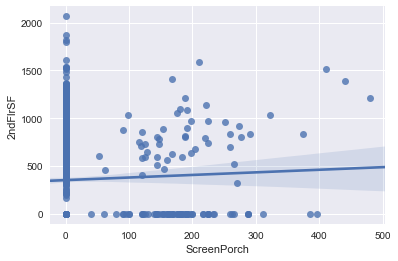

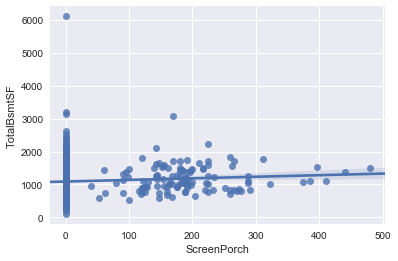

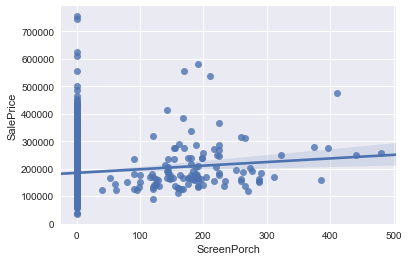

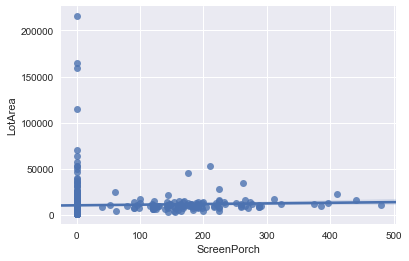

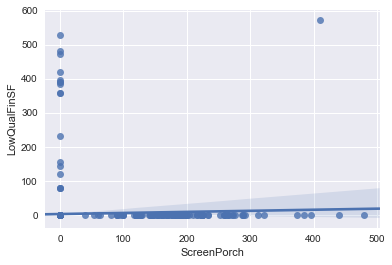

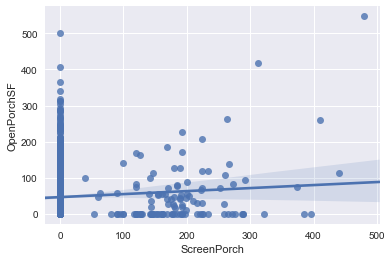

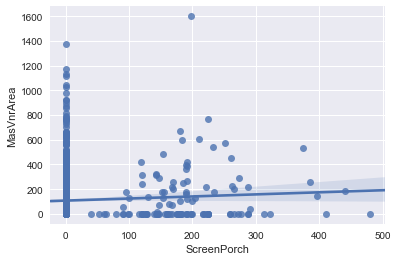

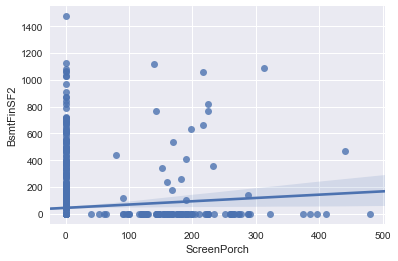

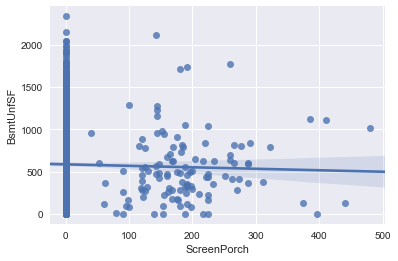

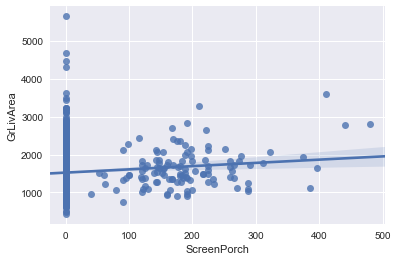

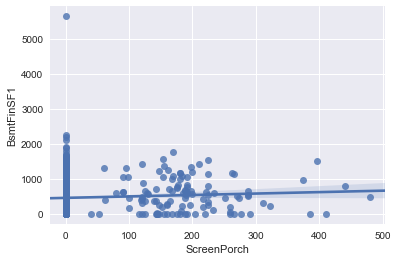

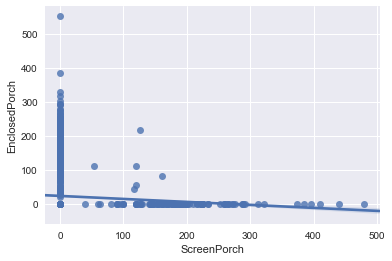

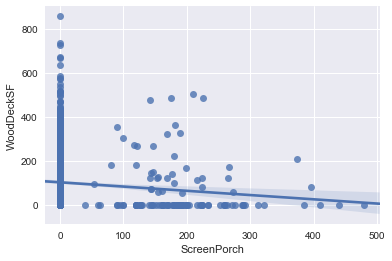

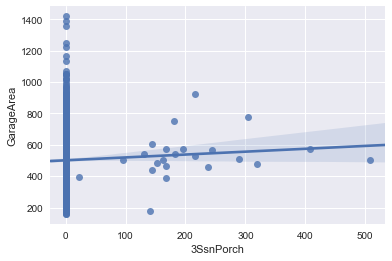

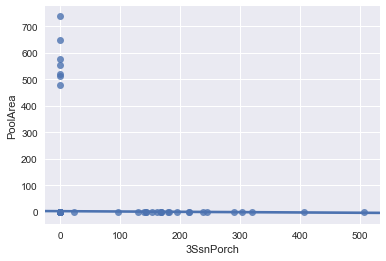

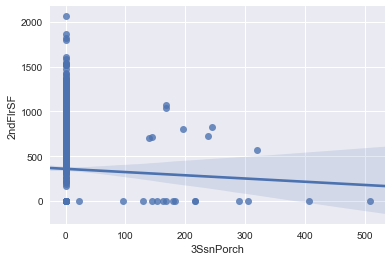

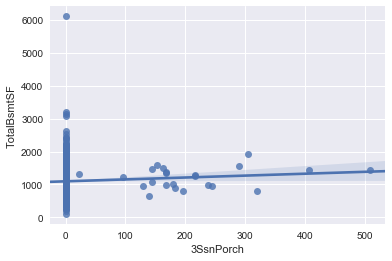

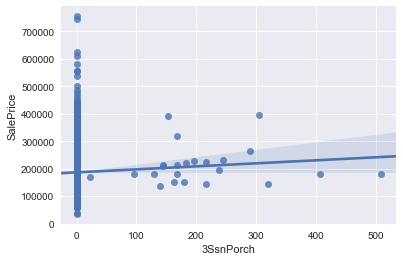

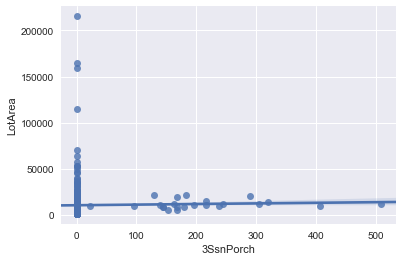

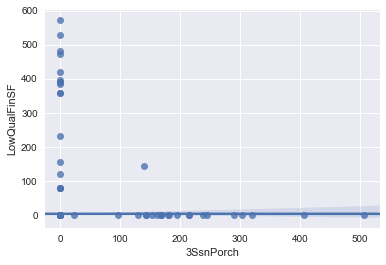

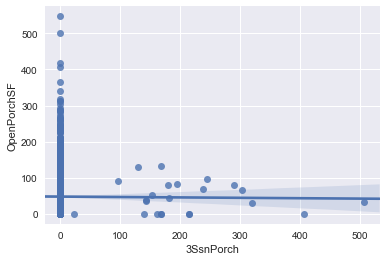

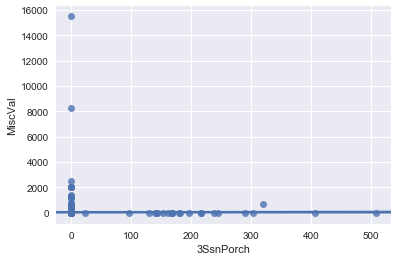

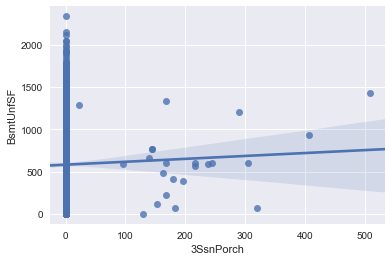

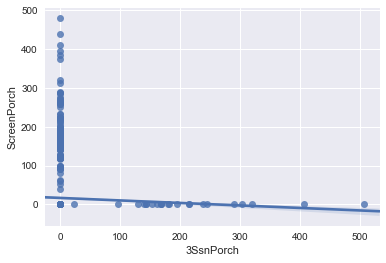

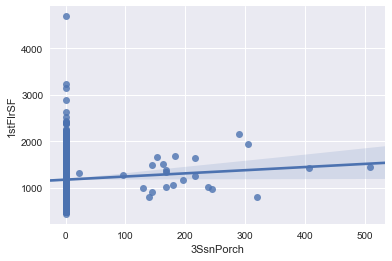

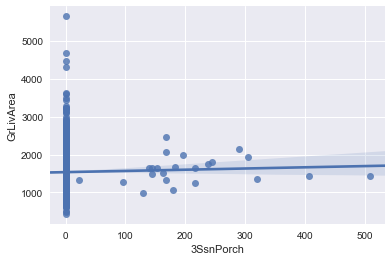

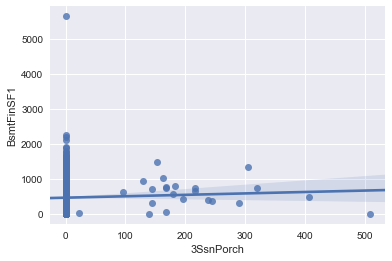

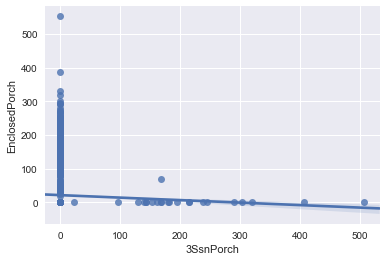

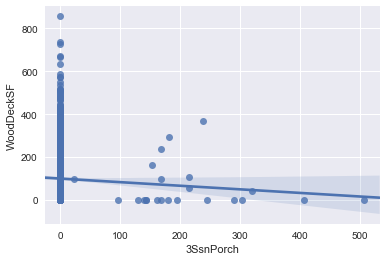

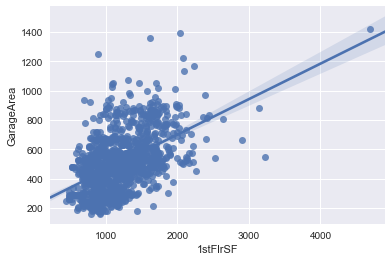

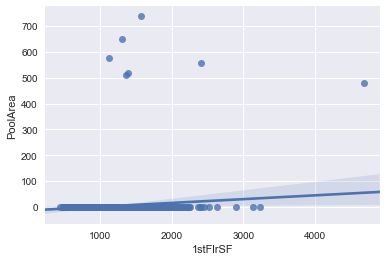

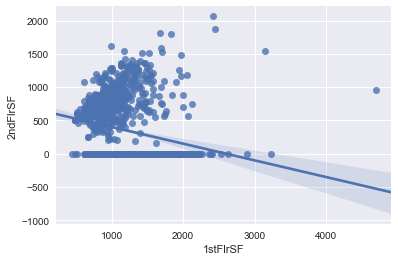

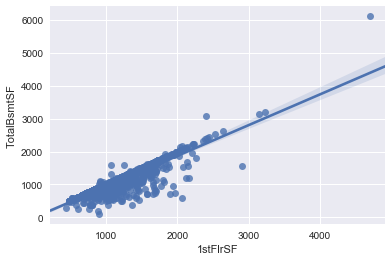

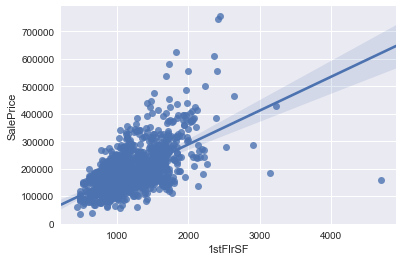

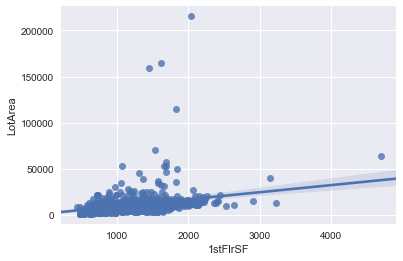

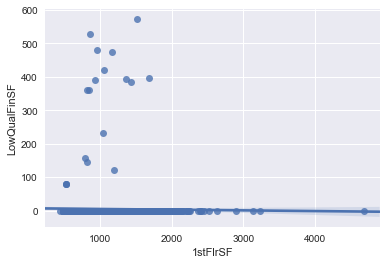

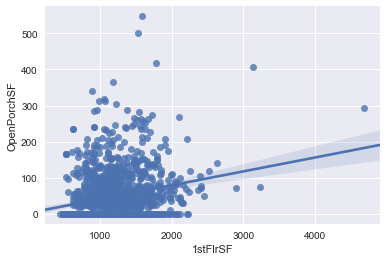

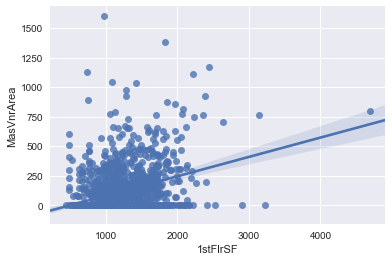

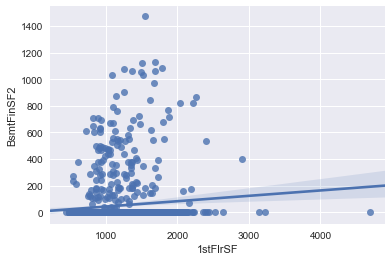

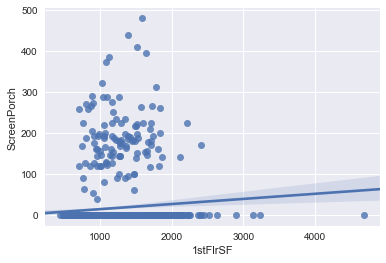

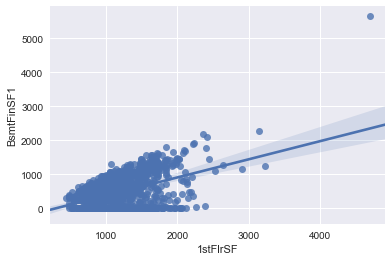

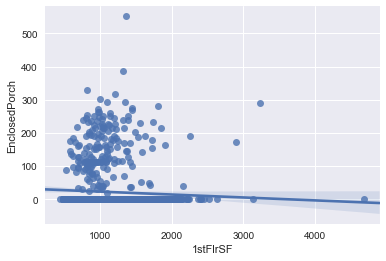

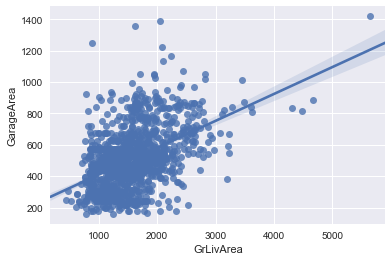

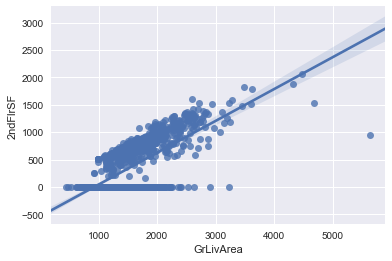

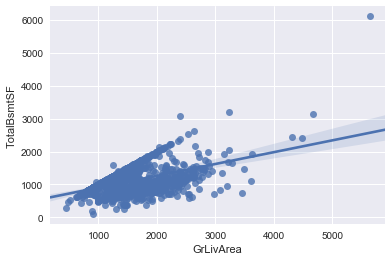

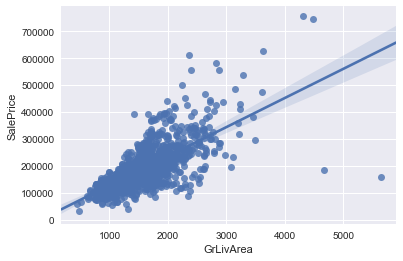

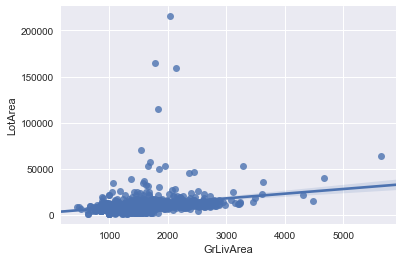

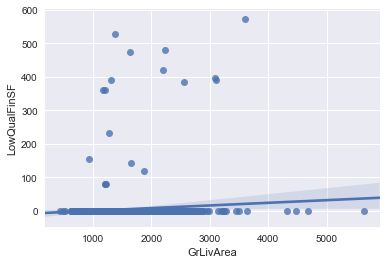

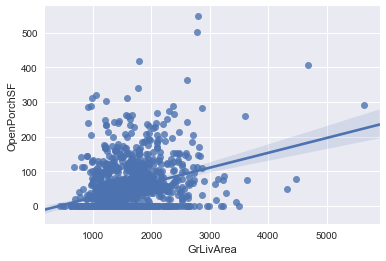

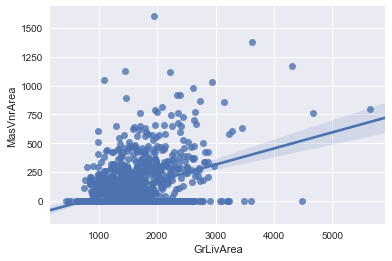

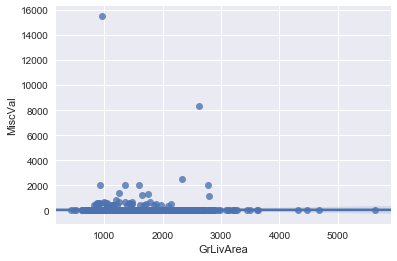

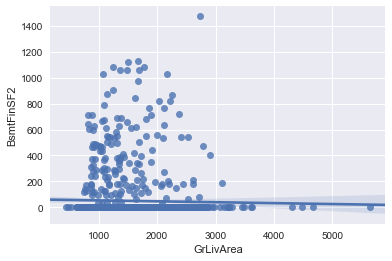

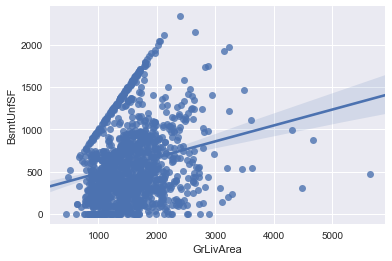

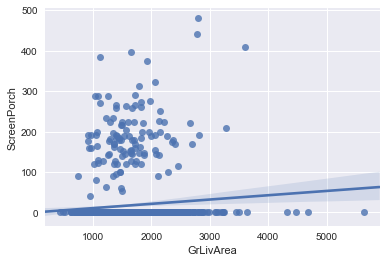

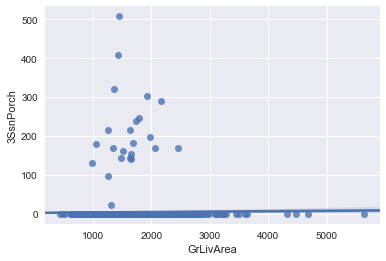

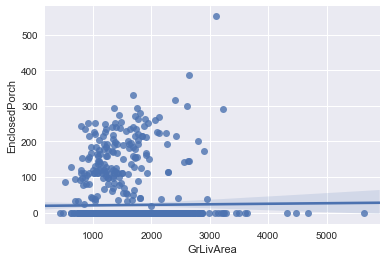

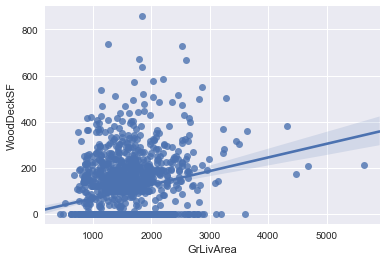

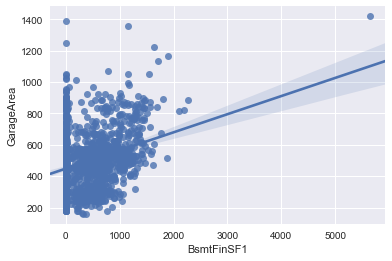

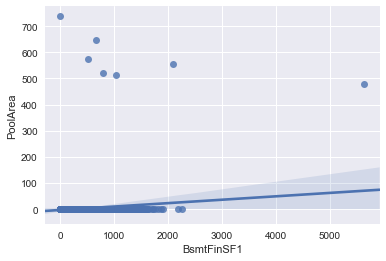

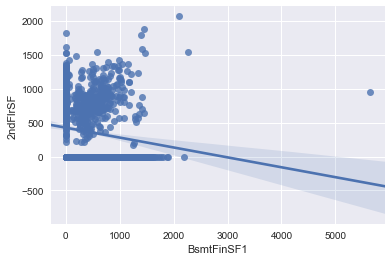

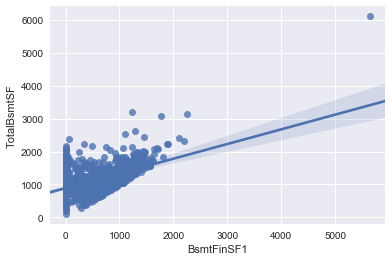

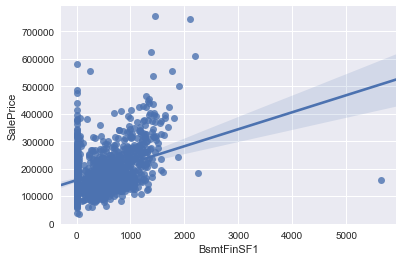

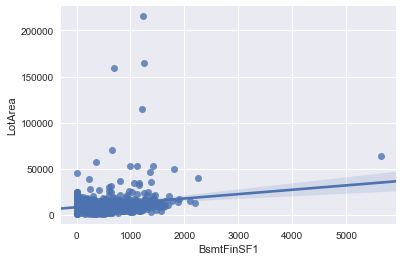

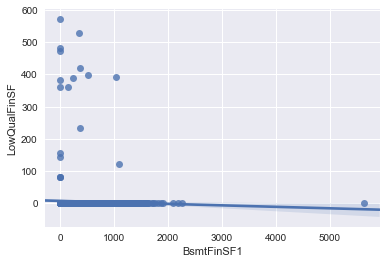

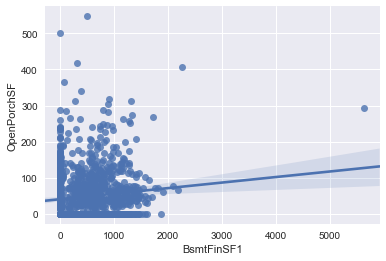

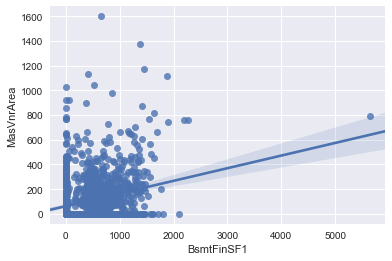

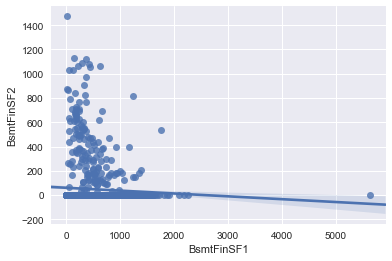

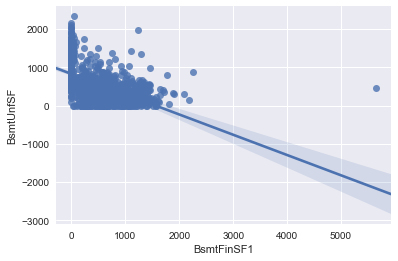

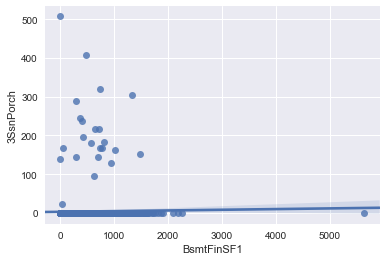

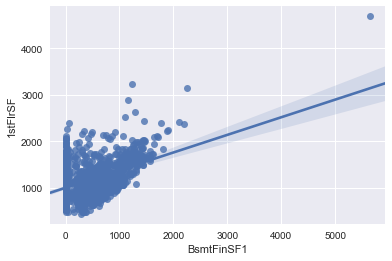

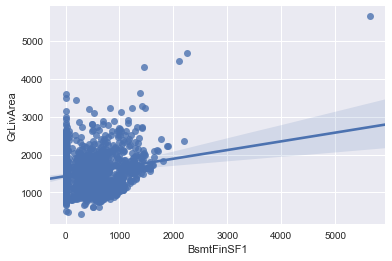

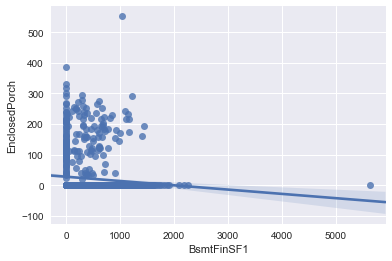

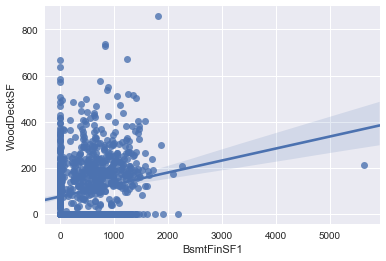

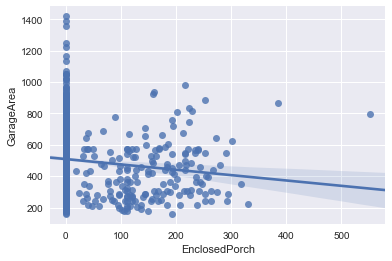

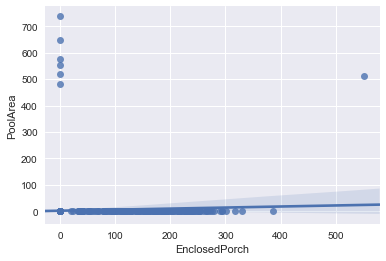

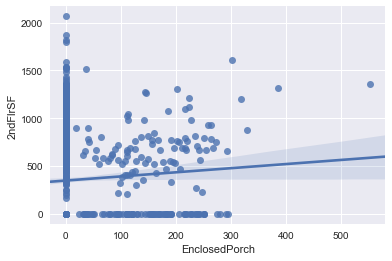

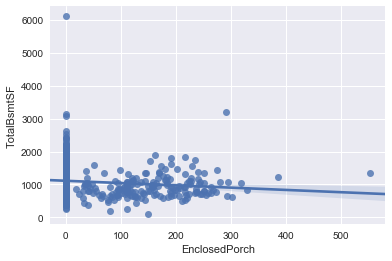

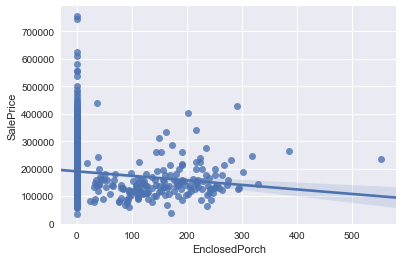

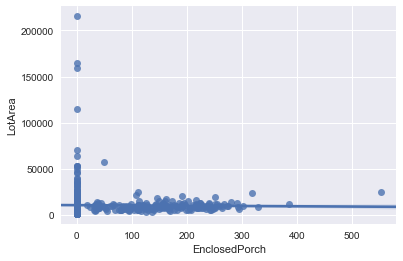

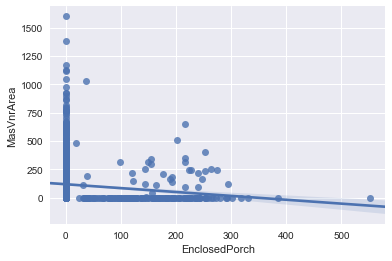

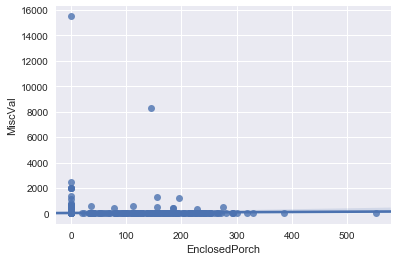

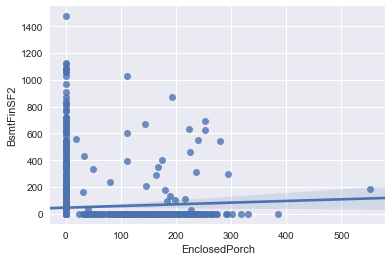

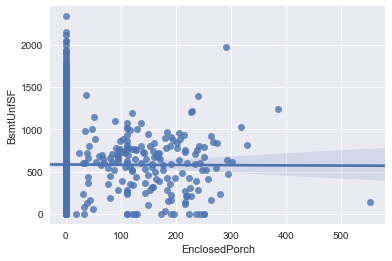

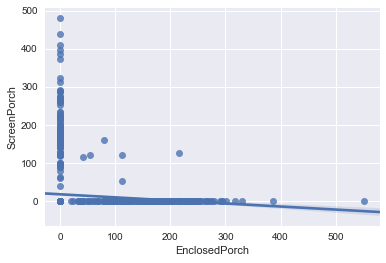

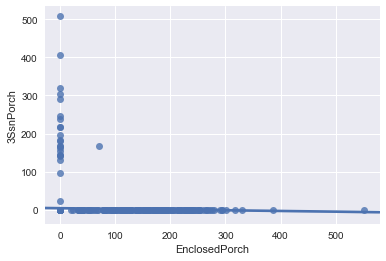

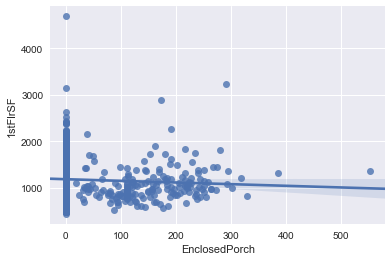

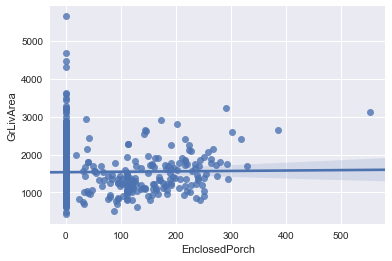

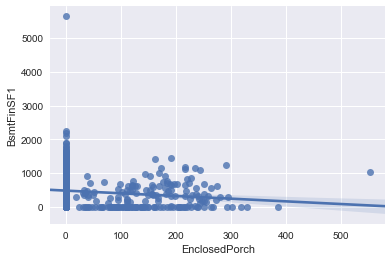

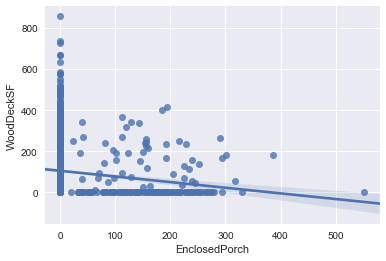

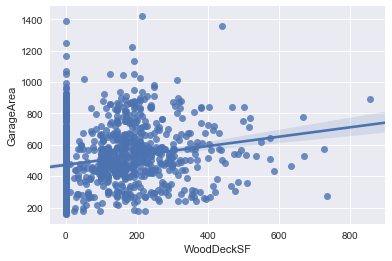

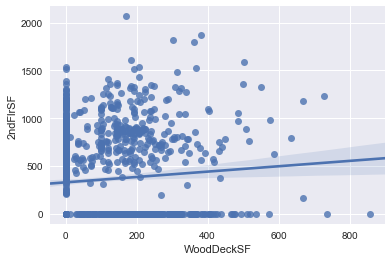

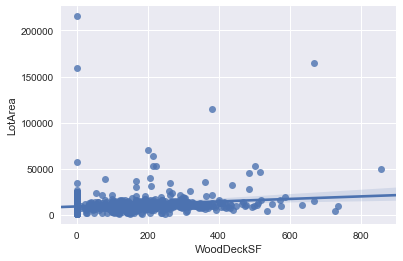

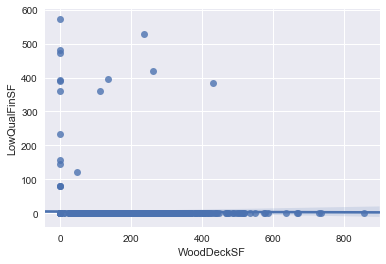

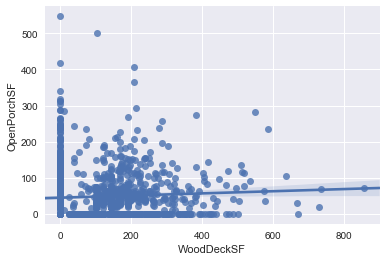

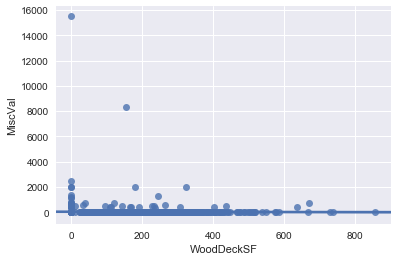

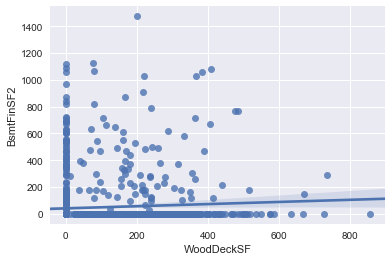

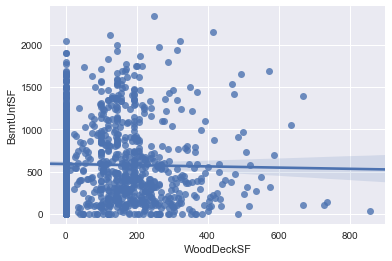

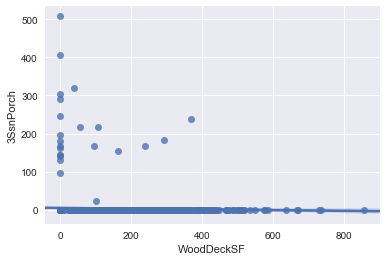

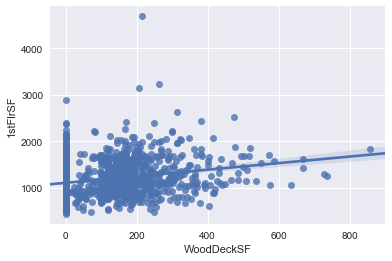

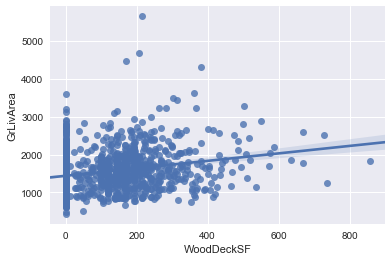

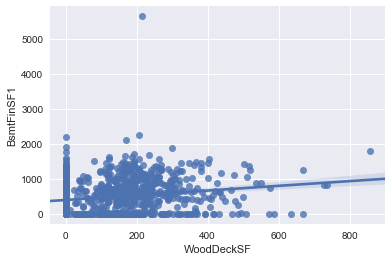

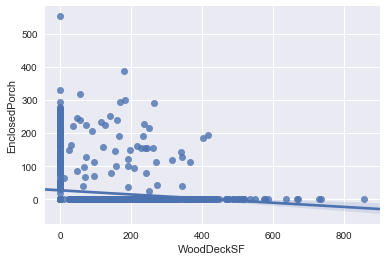

In [25]:
for colx in contCols:
    for coly in contCols:
        if colx != coly:
            ax = sns.regplot(x=colx,y=coly, data=df_dropped)
            plt.show()

In [26]:
# trimp outliers
#df_trim = pd.DataFrame()
#df_trim = df_dropped.copy(deep=True)
#for col in contCols:
#    df_trim = df_trim[df_trim[col] < df_trim[col].quantile(.99)] 

In [27]:
df_allDumm = pd.DataFrame()
df_allNoTxt = pd.DataFrame()

noTxtCols = list(set(df_dropped.columns) - set(catTxtCols))

df_allDumm = pd.get_dummies(df_dropped[catTxtCols])

df_allNoTxt = pd.concat([df_dropped[noTxtCols], df_allDumm], axis=1)

In [28]:
df_allNoTxt.head()

KitchenAbvGr  2ndFlrSF  TotalBsmtSF  BsmtHalfBath  YearBuilt  HalfBath  LotArea  OverallQual  GarageCars  GarageYrBlt  YrSold  BsmtUnfSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  MSSubClass  GarageArea  PoolArea  SalePrice  FullBath  BsmtFullBath  MoSold  LowQualFinSF  YearRemodAdd  MasVnrArea  OpenPorchSF  OverallCond  MiscVal  BsmtFinSF2  ScreenPorch  3SsnPorch  1stFlrSF  BsmtFinSF1  Fireplaces  EnclosedPorch  WoodDeckSF  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  Functional_Maj1  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  Utilities_AllPub  Utilities_NoSeWa  RoofMatl_ClyTile  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0             1       854          856             0       2003         1     8450            7           2       2003.0    2008        150       1710             3             8          60         548         0     208500         2             1       2             0          2003       196.0           61            5        0           0            0          0       856         706           0              0           0              1                0                0               0                0                0                0                0                0               0               0               1                0                0                0                1                 1                 0                 0                 1                 0               0              0                 0                 0                 0            0            0            1            0                  0                 0                1                0   
1             1         0         1262             1       1976         0     9600            6           2       1976.0    2007        284       1262             3             6          20         460         0     181500         2             0       5             0          1976         0.0            0            8        0           0            0          0      1262         978           1              0         298              1                0                0               0                0                0                0                0                0               0               0               1                0                1                0                0                 1                 0                 0                 1                 0               0              0                 0                 0                 0            0            0            1            0                  0                 0                1                0   
2             1       866          920             0       2001         1    11250            7           2       2001.0    2008        434       1786             3             6          60         608         0     223500         2             1       9             0          2002       162.0           42            5        0           0            0          0       920         486           1              0           0              1                0                0               0                0                0                0                0                0               0               0               1                0                0                1                0                 1                 0                 0                 1                 0               0              0                 0                 0                 0            0            0            1            0                  0                 0                1                0   
3             1       7

In [29]:
allFeats = [a for a in df_allNoTxt.columns if a not in ['SalePrice']]
contFeats = [a for a in df_allNoTxt[contCols].columns if a not in ['SalePrice']]

X=df_allNoTxt[allFeats]
Y=df_allNoTxt['SalePrice']
X.head()

KitchenAbvGr  2ndFlrSF  TotalBsmtSF  BsmtHalfBath  YearBuilt  HalfBath  LotArea  OverallQual  GarageCars  GarageYrBlt  YrSold  BsmtUnfSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  MSSubClass  GarageArea  PoolArea  FullBath  BsmtFullBath  MoSold  LowQualFinSF  YearRemodAdd  MasVnrArea  OpenPorchSF  OverallCond  MiscVal  BsmtFinSF2  ScreenPorch  3SsnPorch  1stFlrSF  BsmtFinSF1  Fireplaces  EnclosedPorch  WoodDeckSF  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  Functional_Maj1  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  BsmtExposure_Av  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  Utilities_AllPub  Utilities_NoSeWa  RoofMatl_ClyTile  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  \
0             1       854          856             0       2003         1     8450            7           2       2003.0    2008        150       1710             3             8          60         548         0         2             1       2             0          2003       196.0           61            5        0           0            0          0       856         706           0              0           0              1                0                0               0                0                0                0                0                0               0               0               1                0                0                0                1                 1                 0                 0                 1                 0               0              0                 0                 0                 0            0            0            1            0                  0                 0                1                0                0   
1             1         0         1262             1       1976         0     9600            6           2       1976.0    2007        284       1262             3             6          20         460         0         2             0       5             0          1976         0.0            0            8        0           0            0          0      1262         978           1              0         298              1                0                0               0                0                0                0                0                0               0               0               1                0                1                0                0                 1                 0                 0                 1                 0               0              0                 0                 0                 0            0            0            1            0                  0                 0                1                0                0   
2             1       866          920             0       2001         1    11250            7           2       2001.0    2008        434       1786             3             6          60         608         0         2             1       9             0          2002       162.0           42            5        0           0            0          0       920         486           1              0           0              1                0                0               0                0                0                0                0                0               0               0               1                0                0                1                0                 1                 0                 0                 1                 0               0              0                 0                 0                 0            0            0            1            0                  0                 0                1                0                0   

In [30]:
#help(ensemble.DecisionTreeClassifier)

In [32]:
maxFeatRange = range(2,4)
maxDepthRange = range(2,4)
df_Results = pd.DataFrame()

for maxFeat in maxFeatRange:
    for maxDepth in maxDepthRange:
        
        decision_tree = tree.DecisionTreeRegressor(
            max_features=maxFeat,
            max_depth=maxDepth)
        start_time = time.time()
        dt = decision_tree.fit(X, Y)
        timeVal = time.time() - start_time
        
        crossVal = cross_val_score(dt, X, Y, cv=10)
        r = np.mean(crossVal)
        ovrFit = np.var(crossVal)
        Name = "F"+str(maxFeat)+" D"+str(maxDepth)
        df_Results = df_Results.append({'Name': Name, 
                                        'Accuracy': r,
                                        'OverFit': ovrFit,
                                        'Time' : timeVal
                                       }, ignore_index=True)

df_sorted = df_Results.sort_values('OverFit', ascending=False)


In [34]:
df_sorted = df_Results.sort_values('Accuracy', ascending=False)

In [35]:
df_sorted

Accuracy   Name   OverFit      Time
3  0.232091  F3 D3  0.009065  0.001560
1  0.166874  F2 D3  0.018884  0.001747
2  0.156445  F3 D2  0.023581  0.001319
0  0.109599  F2 D2  0.018479  0.003723

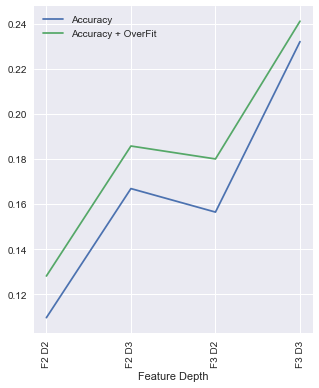

In [36]:
labels = []
plt.figure(figsize=(5,6))
plt.plot(df_Results['Name'], df_Results['Accuracy'])
labels.append('Accuracy')
plt.plot(df_Results['Name'], df_Results['Accuracy'] + df_Results['OverFit'])
labels.append('Accuracy + OverFit')
plt.xlabel('Feature Depth')
plt.legend(labels)
plt.xticks(rotation=90)
plt.show()

In [37]:


rfc = ensemble.RandomForestRegressor()

start_time = time.time()
rfc = rfc.fit(X, Y)
timeVal = time.time() - start_time

results = cross_val_score(rfc, X, Y, cv=10)
display(results)

print ("Random Forest")
print ("Accuracy: " + str(np.mean(results)))
print ("Overfitting: " + str(np.var(results)))
print ("Time: %s secs" % timeVal)


array([ 0.83251965,  0.86254058,  0.9031379 ,  0.72626792,  0.86739057,
        0.88660151,  0.84636988,  0.89285523,  0.76340687,  0.84443234])

Random Forest
Accuracy: 0.84255224408
Overfitting: 0.00290626219509
Time: 0.3253810405731201 secs


In [38]:

def RForestRegressor(maxFeatRange, maxDepthRange,treeRange,X,Y):
    
    df_Results = pd.DataFrame()
    
    for maxFeat in maxFeatRange:
        
        rf = ensemble.RandomForestRegressor(
            #max_features=maxFeat,
            #max_depth=maxDepth,
            n_estimators=treeNum
        )
        start_time = time.time()
        dt = rf.fit(X, Y)
        timeVal = time.time() - start_time

        crossVal = cross_val_score(dt, X, Y, cv=10)
        r = np.mean(crossVal)
        ovrFit = np.var(crossVal)
        crosValRange = max(crossVal) - min(crossVal)
        Name = "F"+str(maxFeat)+" D"+str(maxDepth)
        df_Results = df_Results.append({'Name': Name, 
                                        'Accuracy': r,
                                        'OverFit': crosValRange,
                                        'Time' : timeVal
                                       }, ignore_index=True)

    df_sorted = df_Results.sort_values('OverFit', ascending=False)
    return df_sorted

In [39]:
maxFeatRange = range(2,3)
maxDepthRange = range(2,3)
treeNum = 5
df_out = RForestRegressor(maxFeatRange, maxDepthRange,treeNum, X, Y)

In [69]:
from IPython.display import clear_output

def RForestRegressorTreeOnly(treeRange,X,Y):
    
    df_Results = pd.DataFrame()
    
    for treeNum in treeRange:
        rf = ensemble.RandomForestRegressor(
            #max_features=maxFeat,
            #max_depth=maxDepth,
            n_estimators=treeNum
        )
        
        clear_output()
        print ("{:.0%}".format(treeNum/max(treeRange)))
        
        # fit and time
        start_time = time.time()
        dt = rf.fit(X, Y) 
        timeVal = time.time() - start_time

        # cross val score
        crossVal = cross_val_score(dt, X, Y, cv=10)
        
        r = np.mean(crossVal)
        ovrFit = np.var(crossVal)
        crosValRange = max(crossVal) - min(crossVal)
        #Name = "F"+str(maxFeat)+" D"+str(maxDepth)
        Name = "T"+str(treeNum)
        df_Results = df_Results.append({'Name': Name, 
                                        'Accuracy': r,
                                        'OverFit': crosValRange,
                                        'Time' : timeVal
                                       }, ignore_index=True)

    df_sorted = df_Results.sort_values('Accuracy', ascending=False)
    return df_sorted

In [70]:
maxFeatRange = range(2,3)
maxDepthRange = range(2,3)
treeNumRange = range(2,10)
df_out = RForestRegressorTreeOnly(treeNumRange, X, Y)

100%


In [607]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE
from sklearn import linear_model
import copy


class ModelCat():
    def performance(self):
        print()
       
class ModelCont(Model):
    def initValues(self):
        self.modObjFit = self.modelObj.fit(self.X, self.Y)
        self.rSquared = self.modelObj.score(self.X, self.Y)
        self.crossVal = cross_val_score(self.modelObj, self.X, self.Y, cv=10)
        
    
    def performance(self, boxPlot=True):
        print ("Model: " + self.name)
        print ("r-squared:" + str(self.rSquared))
        print ("Cross Validation Scores: ")
        print (self.crossVal)
        if boxPlot:
            fig = plt.figure()
            title = "Performance: %s" % (self.name)
            fig.suptitle(title)
            ax = fig.add_subplot(111)
            plt.boxplot(self.crossVal)
            ax.set_xticklabels(self.name)
            plt.show()
    
    def compareFolds(self, modelRight):
        fmt = '{:<2}{:<20}|{:<10}'
        a_left = self.crossVal
        a_right = modelRight.crossVal
        a_left.sort()
        a_right.sort()
        
        print("CROSS VALIDATION SCORES")
        print(fmt.format('',self.name,modelRight.name))
        for i, (left, right) in enumerate(zip(a_left, a_right)):
            print(fmt.format(i, left, right))
            
    def compareR(self,modelRight):
        fmt = '{:<2}{:<20}|{:<20}'
        
        print("R-SQUARED")
        print(fmt.format('',self.name,modelRight.name))
        print(fmt.format('',self.rSquared,modelRight.rSquared))
        
    def compareBox(self,modelList,filter=0, newTitle=''):
        results = []
        names = []
        
        results.append(self.crossVal)
        names.append(self.name)
        
        for rightModel in modelList:
            if filter > 0:
                if rightModel.crossVal.mean() > filter:
                    results.append(rightModel.crossVal)
                    names.append(rightModel.name)
            else:
                results.append(rightModel.crossVal)
                names.append(rightModel.name)
        
        fig = plt.figure()
        if newTitle != '':
            title = newTitle
        else:
            title = "Performance: %s" % (self.name)
        fig.suptitle(title)
        ax = fig.add_subplot(111)
        
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.show()

    def fullCompare(self,modelRight):
        self.compareR(modelRight)
        self.compareFolds(modelRight)
        modelList = []
        modelList.append(modelRight)
        self.compareBox(modelList)

class LassoRegModel(ModelCont): 
    def __init__(self,name,xNames,yName,alpha,trainData):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.alpha = alpha
        self.modelObj = linear_model.Lasso(alpha=alpha)
        super().initValues()

class RidgeRegModel(ModelCont): 
    def __init__(self,name,xNames,yName,alpha,trainData):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.alpha = alpha
        self.modelObj = linear_model.Ridge(alpha=alpha, fit_intercept=False)
        super().initValues()

class LogisticRegModel(ModelCat):
    def __init__(self,name,xNames,yName,regCoeff,trainData):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.alpha = alpha
        self.modelObj = LogisticRegression(C=regCoeff)
        self.fitResult = self.modelObj.fit(self.X, self.Y)

    
class KNNModel(ModelCont):
    def __init__(self,name,xNames,yName,kVal,trainData, weighted=True):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.weighted = weighted
        
        if self.weighted:
            self.modelObj = neighbors.KNeighborsRegressor(n_neighbors=kVal, weights='distance')
        else:
            self.modelObj = neighbors.KNeighborsRegressor(n_neighbors=kVal)
            
        self.modelObj.fit(self.X, self.Y)
        self.rSquared = self.modelObj.score(self.X, self.Y)
        self.crossVal = cross_val_score(self.modelObj, self.X, self.Y, cv=10)
       
    
        
class OLSModel(ModelCont):
    def __init__(self,name,xNames,yName,trainData):
        from sklearn.model_selection import cross_val_score
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        
        # sklearn
        self.regr = linear_model.LinearRegression()
        self.regr.fit(self.X,self.Y)
        self.rSquared = self.regr.score(self.X,self.Y)
        self.crossVal = cross_val_score(self.regr, self.X, self.Y, cv=10)
        
        #statsmodel
        self.lm = sm.OLS(self.Y, self.X).fit()
        self.params = self.lm.params
        self.pvalues = self.lm.pvalues
    
    def featureRanking(self):
        featSelector = RFE(self.regr)
        featSelector = featSelector.fit(self.X, self.Y)
        rankings = pd.DataFrame({'Features': self.X.columns, 'Ranking' : featSelector.ranking_})
        print (rankings.sort_values('Ranking'))

In [616]:
regCoeff=1e9
df_allNoTxtCatCol = df_allNoTxt.drop('SalePrice', axis=1)
df_allNoTxtCatCol['SalePriceCat'] = pd.qcut(Y, 2,labels=False)
xNames = X.columns
logRegModel = LogisticRegModel('logRegModel_1',xNames,'SalePriceCat',regCoeff,df_allNoTxtCatCol)

In [ ]:
logRegModel.fitResult.predict()

In [ ]:
pd.crosstab(df_allNoTxtCatCol['SalePriceCat'] )

In [618]:
logRegModel.fitResult.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [596]:
trainData = df_allNoTxt
yName = 'SalePrice'
xNames = contColsHighCorr
sX = trainData[xNames]
sY = trainData[yName]
salpha = 1e9
smodelObj = LogisticRegression(C=salpha)

In [597]:
sfit = smodelObj.fit(sX, sY)

In [598]:
smodelObj.score(sX, sY)

0.26756352765321373

In [593]:
sfit.coef_.size

163680

In [599]:
sfit.s

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [582]:
#regCoeff=1e9
#logRegModel = LogisticRegModel('logRegModel_1',xNames,'SalePrice',regCoeff,df_allNoTxt)

In [583]:
xNames=X.columns
yName='SalePrince'
alpha=50
rdgModel = RidgeRegModel('rdgModel_1',xNames,'SalePrice',alpha,df_allNoTxt)

Model: rdgModel_1
r-squared:0.87416461807
Cross Validation Scores: 
[ 0.90783315  0.89806266  0.91053659  0.74770152  0.860367    0.87808992
  0.87711185  0.87259758  0.41041913  0.88327163]


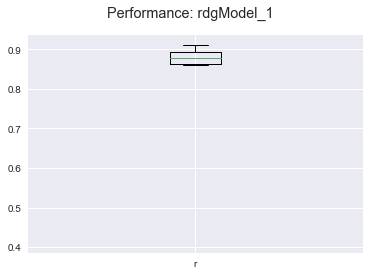

In [584]:
rdgModel.performance()

Model: lsModel_1
r-squared:0.0
Cross Validation Scores: 
[ -1.03754814e-02  -2.15058189e-02  -2.52710097e-05  -5.43371793e-03
  -4.48752480e-03  -8.01962530e-05  -1.25972653e-02  -4.29009464e-03
  -4.85848030e-05  -2.91245636e-03]


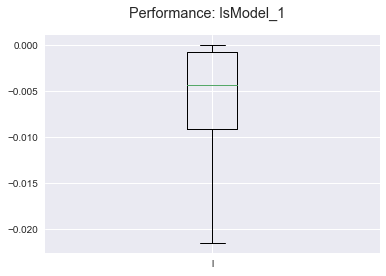

In [565]:
xNames=X.columns
yName='SalePrince'
alpha=.35
lsModel = LassoRegModel('lsModel_1',xNames,'SalePrice',alpha,df_allNoTxt)
lsModel.performance()

Model: lsModel_1
r-squared:0.928366288172
Cross Validation Scores: 
[ 0.89415277  0.8780526   0.92319936  0.72625026  0.89843117  0.65625454
  0.89532684  0.87736975  0.39101623  0.89547378]


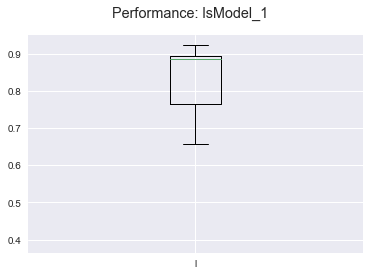

In [563]:
lsModel.performance()

In [527]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
from IPython.display import clear_output
from sklearn.linear_model import LogisticRegression


class Tuner():
    
    def DisplayResultsGraph(self):
        labels = []
        widthscale = self.totIter/4
        plt.figure(figsize=(widthscale,6))
        plt.plot(self.results['Name'], self.results['Accuracy'])
        labels.append('Accuracy')
        plt.plot(self.results['Name'], self.results['Accuracy'] + self.results['Range'])
        labels.append('Accuracy + Range')
        plt.xlabel('Tree Feature Depth')
        plt.legend(labels)
        plt.xticks(rotation=90)
        plt.show()
    
    def DisplayResultsSummary(self):
        resultSortAcc = self.results.sort_values('Accuracy', ascending=False)
        resultSortRan = self.results.sort_values('Range', ascending=True)
        
        print("Highest Accuracy")
        display(resultSortAcc.head())
        
        print("\nLowest Range")
        display(resultSortRan.head())
        
    def FullResult(self):
        self.DisplayResultsGraph()
        self.DisplayResultsSummary()
        
    def disBox(self):
        plt.boxplot(self.results)
        ax.set_xticklabels(names)
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.show()
                    

class RForestTuner(Tuner):
    
    def __init__(self,X,y,treeRange=None,maxDepthRange=None,maxFeatsRange=None):
        self.y = y
        self.X = X
        
        self.treeRange = []
        self.maxDepthRange = []
        self.maxFeatsRange = []
        
        self.treeDefault = 10
        self.depthDefault = None
        self.featsDefault = 'auto'
                
        if (treeRange == None):
            self.treeRange.append(10)
        else:
            self.treeRange=treeRange    
        if (maxDepthRange == None):
            self.maxDepthRange.append(None)
        else:
            self.maxDepthRange=maxDepthRange
        if (maxFeatsRange == None):
            self.maxFeatsRange.append('auto')
        else:
            self.maxFeatsRange=maxFeatsRange
        
        self.__genResults()    
    
    def getCrossVal(self,nEstimators=10,maxDepth=None,maxFeats='auto'):
        
        rf = ensemble.RandomForestRegressor(
            n_estimators=nEstimators,
            max_depth=maxDepth,
            max_features=maxFeats
        )
        cvs = cross_val_score(rf,self.X,self.y,cv=10)
        return cvs
    
        
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range'])
        self.totIter = len(self.treeRange)*len(self.maxDepthRange)*len(self.maxFeatsRange)
        c=1
        for treeVal in self.treeRange:
            for maxDepth in self.maxDepthRange:
                for maxFeats in self.maxFeatsRange: 
                    name = "T:{0} F:{1} D:{2}".format(treeVal,maxDepth,maxFeats)
                    crossVal = self.getCrossVal(treeVal, maxDepth, maxFeat)
                    r = np.mean(crossVal)
                    crosValRange = max(crossVal) - min(crossVal)
                    self.results = self.results.append({'Name': name, 
                                        'Accuracy': r,
                                        'Range': crosValRange
                                       }, ignore_index=True)
                    clear_output()
                    print ("{:.0%} {}".format((c/self.totIter), name))
                    c += 1
    
class LogRegTuner(Tuner):

    def __init__(self,X,y,regCoeffRange):
        self.y = y
        self.X = X
        self.regCoeffRange = regCoeffRange
                
        self.__genResults()    
    
    def getCrossVal(self):
        print('Not Compatible')
        
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy'])
        self.totIter = len(self.regCoeffRange)
        c=1

        for regCoeff in self.regCoeffRange: 
            name = "C:{0}".format(regCoeff)
            lr = LogisticRegression(C=regCoeff)
            fit = lr.fit(self.X,self.y)
            
            pred_y_sklearn = lr.predict(self.X)
            self.results = self.results.append({'Name': name, 
                                'Accuracy': lr.score(self.X, self.y)
                               }, ignore_index=True)
            clear_output()
            print ("{:.0%} {}".format((c/self.totIter), name))
            c += 1

    def DisplayResultsGraph(self):
        labels = []
        widthscale = self.totIter/4
        plt.figure(figsize=(widthscale,6))
        plt.plot(self.results['Name'], self.results['Accuracy'])
        labels.append('Accuracy')
        plt.xlabel('Regularization Coefficient')
        plt.legend(labels)
        plt.xticks(rotation=90)
        plt.show()
    
    def DisplayResultsSummary(self):
        resultSortAcc = self.results.sort_values('Accuracy', ascending=False)

        print("Highest Accuracy")
        display(resultSortAcc.head())

        
class RidgeTuner(Tuner):
    
    def __init__(self,X,y,alphaRange):
        self.y = y
        self.X = X
        self.alphaRange = alphaRange
                
        self.__genResults()
        
    def getCrossVal(self,alpha):
        rr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
        cvs = cross_val_score(rr,self.X,self.y,cv=10)
        return cvs
    
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range'])
        self.totIter = len(self.alphaRange)
        c=1

        for alpha in self.alphaRange: 
            name = "A:{0}".format(alpha)
            crossVal = self.getCrossVal(alpha)
            r = np.mean(crossVal)
            crosValRange = max(crossVal) - min(crossVal)
            self.results = self.results.append({'Name': name, 
                                'Accuracy': r,
                                'Range': crosValRange
                               }, ignore_index=True)

            clear_output()
            print ("{:.0%} {}".format((c/self.totIter), name))
            c += 1

class LassoTuner(Tuner):
    
    def __init__(self,X,y,alphaRange):
        self.y = y
        self.X = X
        self.alphaRange = alphaRange
                
        self.__genResults()
        
    def getCrossVal(self,alpha):
        rr = linear_model.Lasso(alpha=alpha)
        cvs = cross_val_score(rr,self.X,self.y,cv=10)
        return cvs
    
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range'])
        self.totIter = len(self.alphaRange)
        c=1

        for alpha in self.alphaRange: 
            name = "A:{0}".format(alpha)
            crossVal = self.getCrossVal(alpha)
            r = np.mean(crossVal)
            crosValRange = max(crossVal) - min(crossVal)
            self.results = self.results.append({'Name': name, 
                                'Accuracy': r,
                                'Range': crosValRange
                               }, ignore_index=True)

            clear_output()
            print ("{:.0%} {}".format((c/self.totIter), name))
            c += 1

In [534]:
alphaRange = np.arange(.001,.99,.1)
lsTuner = LassoTuner(X,Y,alphaRange)

100% A:0.901


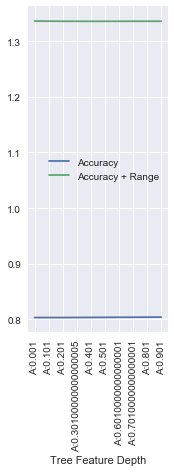

Highest Accuracy


Name  Accuracy     Range
9               A:0.901  0.804190  0.531716
8               A:0.801  0.804072  0.531811
7  A:0.7010000000000001  0.803960  0.531917
6  A:0.6010000000000001  0.803847  0.531984
5               A:0.501  0.803737  0.532053


Lowest Range


Name  Accuracy     Range
9               A:0.901  0.804190  0.531716
8               A:0.801  0.804072  0.531811
7  A:0.7010000000000001  0.803960  0.531917
6  A:0.6010000000000001  0.803847  0.531984
5               A:0.501  0.803737  0.532053

In [535]:
lsTuner.FullResult()

In [517]:
regCoeffRange = np.arange(1e8,1e9,1e7)
SalePriceCat = pd.qcut(Y, 2,labels=False)
lrTuner = LogRegTuner(X,SalePriceCat,regCoeffRange)

100% C:990000000.0


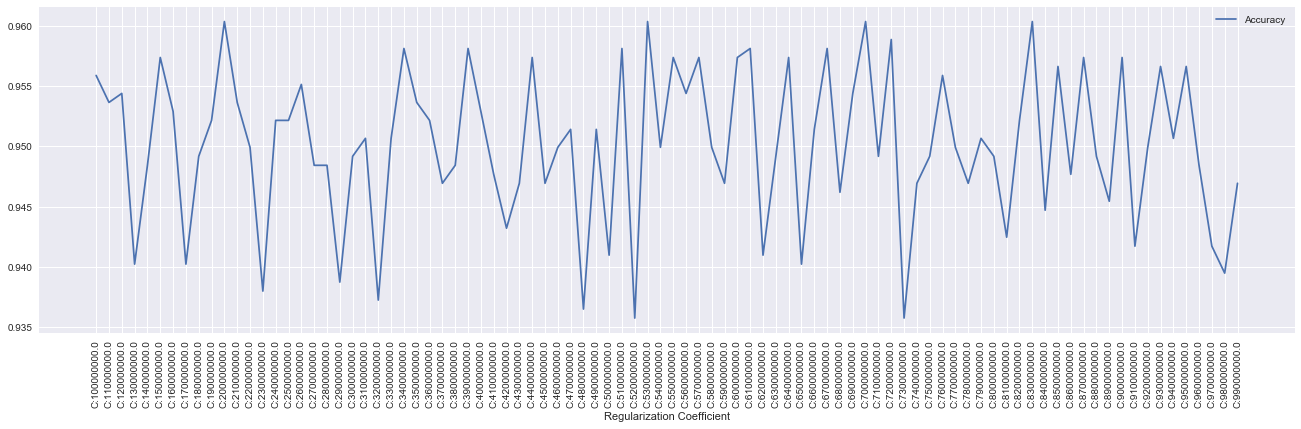

Highest Accuracy


Name  Accuracy
10  C:200000000.0  0.960389
43  C:530000000.0  0.960389
60  C:700000000.0  0.960389
73  C:830000000.0  0.960389
62  C:720000000.0  0.958894

In [509]:
lrTuner.FullResult()

In [514]:
treeRange = range(17,20)
maxDepthRange = range(17,20)
maxFeatRange = range(17,20)

rfTuner = RForestTuner(X,Y,treeRange,maxDepthRange,maxFeatRange)

100% T:19 F:19 D:19


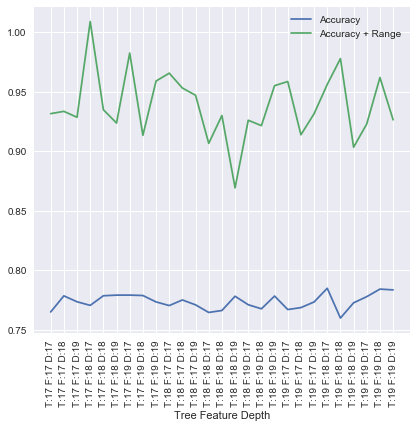

Highest Accuracy


Name  Accuracy     Range
21  T:19 F:18 D:17  0.784731  0.171335
25  T:19 F:19 D:18  0.784033  0.177848
26  T:19 F:19 D:19  0.783373  0.142950
6   T:17 F:19 D:17  0.778993  0.203433
5   T:17 F:18 D:19  0.778970  0.144622


Lowest Range


Name  Accuracy     Range
14  T:18 F:18 D:19  0.778024  0.091116
23  T:19 F:18 D:19  0.772515  0.130783
7   T:17 F:19 D:18  0.778645  0.134625
12  T:18 F:18 D:17  0.764403  0.142131
26  T:19 F:19 D:19  0.783373  0.142950

In [516]:
rfTuner.FullResult()

Highest Accuracy


Name  Accuracy     Range
4  T:18 F:18 D:auto  0.779453  0.140799
8  T:19 F:19 D:auto  0.778862  0.164698
3  T:18 F:17 D:auto  0.777178  0.154076
6  T:19 F:17 D:auto  0.776710  0.112511
0  T:17 F:17 D:auto  0.773140  0.244737


Lowest Range


Name  Accuracy     Range
6  T:19 F:17 D:auto  0.776710  0.112511
7  T:19 F:18 D:auto  0.770738  0.140017
4  T:18 F:18 D:auto  0.779453  0.140799
1  T:17 F:18 D:auto  0.767960  0.153150
3  T:18 F:17 D:auto  0.777178  0.154076

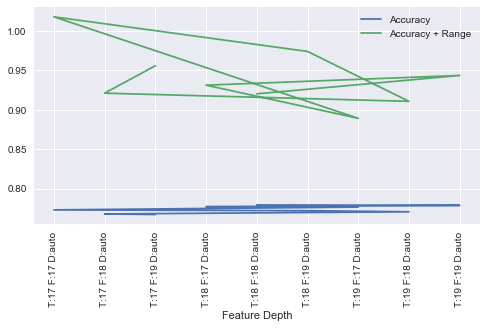

In [413]:
rfTuner.DisplayResultsSummary()

In [363]:
rfTuner.results

Name  Accuracy     Range
0    T15 F15 D15  0.758295  0.188555
1    T15 F15 D16  0.771375  0.171056
2    T15 F15 D17  0.764036  0.144799
3    T15 F15 D18  0.766754  0.179535
4    T15 F15 D19  0.761820  0.123106
5    T15 F16 D15  0.769989  0.149763
6    T15 F16 D16  0.762610  0.233699
7    T15 F16 D17  0.764550  0.202690
8    T15 F16 D18  0.758331  0.121245
9    T15 F16 D19  0.754539  0.134132
10   T15 F17 D15  0.752735  0.201668
11   T15 F17 D16  0.774350  0.168643
12   T15 F17 D17  0.747784  0.197830
13   T15 F17 D18  0.768964  0.201935
14   T15 F17 D19  0.762224  0.114661
15   T15 F18 D15  0.768359  0.166200
16   T15 F18 D16  0.756725  0.168414
17   T15 F18 D17  0.760888  0.223648
18   T15 F18 D18  0.770476  0.225295
19   T15 F18 D19  0.771439  0.148152
20   T15 F19 D15  0.762457  0.149870
21   T15 F19 D16  0.771735  0.228325
22   T15 F19 D17  0.763621  0.209718
23   T15 F19 D18  0.759434  0.143121
24   T15 F19 D19  0.776900  0.209054
25   T16 F15 D15  0.761220  0.167197
26   T16 F15 D16  0.762647  0.152626
27   T16 F15 D17  0.771357  0.129899
28   T16 F15 D18  0.766668  0.155060
29   T16 F15 D19  0.759117  0.132708
30   T16 F16 D15  0.773740  0.083488
31   T16 F16 D16  0.766332  0.167934
32   T16 F16 D17  0.756554  0.170714
33   T16 F16 D18  0.762812  0.152089
34   T16 F16 D19  0.769942  0.184957
35   T16 F17 D15  0.768417  0.149821
36   T16 F17 D16  0.775990  0.148831
37   T16 F17 D17  0.757474  0.234658
38   T16 F17 D18  0.771034  0.234292
39   T16 F17 D19  0.767814  0.188082
40   T16 F18 D15  0.772670  0.170543
41   T16 F18 D16  0.774704  0.173140
42   T16 F18 D17  0.770769  0.185783
43   T16 F18 D18  0.782987  0.174812
44   T16 F18 D19  0.764366  0.199686
45   T16 F19 D15  0.785131  0.173858
46   T16 F19 D16  0.777256  0.109221
47   T16 F19 D17  0.762514  0.246494
48   T16 F19 D18  0.766224  0.168412
49   T16 F19 D19  0.765504  0.230017
50   T17 F15 D15  0.777649  0.148131
51   T17 F15 D16  0.763722  0.130624
52   T17 F15 D17  0.760626  0.207958
53   T17 F15 D18  0.758577  0.162893
54   T17 F15 D19  0.781039  0.175943
55   T17 F16 D15  0.779067  0.195350
56   T17 F16 D16  0.784244  0.163500
57   T17 F16 D17  0.764516  0.117883
58   T17 F16 D18  0.758008  0.170811
59   T17 F16 D19  0.787775  0.129672
60   T17 F17 D15  0.765039  0.160989
61   T17 F17 D16  0.762471  0.206049
62   T17 F17 D17  0.757306  0.234692
63   T17 F17 D18  0.774845  0.160319
64   T17 F17 D19  0.759675  0.244388
65   T17 F18 D15  0.758002  0.190347
66   T17 F18 D16  0.780362  0.204738
67   T17 F18 D17  0.795301  0.118632
68   T17 F18 D18  0.763193  0.174042
69   T17 F18 D19  0.772515  0.124773
70   T17 F19 D15  0.785162  0.164452
71   T17 F19 D16  0.761928  0.235490
72   T17 F19 D17  0.759842  0.167750
73   T17 F19 D18  0.776230  0.212676
74   T17 F19 D19  0.779935  0.179897
75   T18 F15 D15  0.767917  0.219891
76   T18 F15 D16  0.780836  0.126905
77   T18 F15 D17  0.758132  0.108889
78   T18 F15 D18  0.770520  0.165962
79   T18 F15 D19  0.765913  0.212958
80   T18 F16 D15  0.771383  0.190245
81   T18 F16 D16  0.770955  0.208265
82   T18 F16 D17  0.758543  0.158727
83   T18 F16 D18  0.777773  0.137979
84   T18 F16 D19  0.785782  0.187837
85   T18 F17 D15  0.775015  0.182998
86   T18 F17 D16  0.782451  0.121993
87   T18 F17 D17  0.764477  0.164530
88   T18 F17 D18  0.764736  0.222808
89   T18 F17 D19  0.764294  0.111302
90   T18 F18 D15  0.781200  0.121186
91   T18 F18 D16  0.769785  0.154554
92   T18 F18 D17  0.776925  0.112401
93   T18 F18 D18  0.769629  0.222636
94   T18 F18 D19  0.769882  0.168215
95   T18 F19 D15  0.760145  0.192274
96   T18 F19 D16  0.774337  0.127655
97   T18 F19 D17  0.786740  0.158813
98   T18 F19 D18  0.777125  0.122933
99   T18 F19 D19  0.781725  0.195319
100  T19 F15 D15  0.778594  0.121369
101  T19 F15 D16  0.763715  0.153258
102  T19 F15 D17  0.768538  0.156792
103  T19 F15 D18  0.763697  0.133992
104  T19 F15 D19  0.768917  0.146848
105  T19 F16 D15  0.767311  0.198058
106  T19 F16 D16  0.778677  0.140381
107  T19 F16 D17

In [365]:
rfTuner.DisplayResultsSummary()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

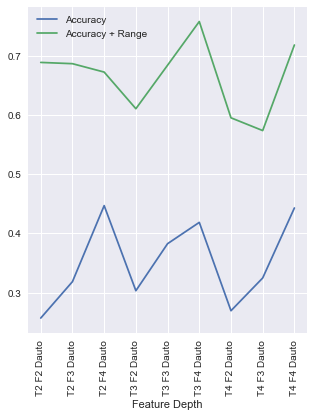

In [343]:
labels = []
plt.figure(figsize=(5,6))
plt.plot(rfTuner.results['Name'], rfTuner.results['Accuracy'])
labels.append('Accuracy')
plt.plot(rfTuner.results['Name'], rfTuner.results['Accuracy'] + rfTuner.results['Range'])
labels.append('Accuracy + Range')
plt.xlabel('Feature Depth')
plt.legend(labels)
plt.xticks(rotation=90)
plt.show()

In [240]:
rfTuner.getCrossVal()

array([ 0.85296176,  0.81801858,  0.90819379,  0.699556  ,  0.86120249,
        0.85792032,  0.87479668,  0.90137181,  0.72564089,  0.84417733])

In [234]:
rfr = ensemble.RandomForestRegressor(
            #max_features=maxFeat,
            #max_depth=maxDepth,
            n_estimators=3
        )

        # cross val score
crossVal = cross_val_score(rfr, X, Y, cv=10)
print(crossVal)        

[ 0.81961261  0.80067883  0.88118235  0.58105744  0.83377989  0.86749983
  0.8446208   0.8843656   0.74961446  0.82211597]


In [160]:
rf = ensemble.RandomForestRegressor(n_estimators=3)


In [161]:
cross_val_score(rf,X,Y,cv=10)

array([ 0.81849026,  0.78633772,  0.8523468 ,  0.73064025,  0.77858193,
        0.81641104,  0.85098268,  0.83345498,  0.69354794,  0.79455231])

In [162]:
treeRange = range(2,3)
maxDepthRange = range(2,3)
maxFeatRange = range(2,3)
rfTuner = RForestTuner(X,Y,treeRange, maxDepthRange, maxFeatRange)

In [163]:
rfTuner.printHI()

hello


In [98]:
df_out

Accuracy Name   OverFit      Time
7  0.847810   T9  0.132780  0.284870
5  0.839936   T7  0.150210  0.223207
4  0.833203   T6  0.136506  0.178100
6  0.822390   T8  0.286653  0.242749
3  0.818936   T5  0.202727  0.158546
2  0.808449   T4  0.271357  0.133148
1  0.789532   T3  0.281344  0.097546
0  0.775953   T2  0.239907  0.079079

In [ ]:
SalePriceCat = pd.qcut(df_allNoTxt['SalePrice'], 2,labels=False)
noSalePrice = df_allNoTxt.drop('SalePrice', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
X=noSalePrice
Y=SalePriceCat

In [ ]:
fit = lr.fit(X,Y)

In [ ]:
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracry by admissino status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

In [ ]:
from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)

In [ ]:
ridgeregr.fit(X,Y)
print(ridgeregr.score(X,Y))